# **I. Protein Differential Expression**

## **1. Setup**

In [1]:
## SETUP 

suppressPackageStartupMessages(library(knitr, quietly))
opts_knit$set(eval.after = "fig.cap")

knitr::opts_chunk$set(echo = TRUE, warnings=FALSE, messages=FALSE, highlight=TRUE, 
                      collapse=TRUE, tidy=FALSE)

## **2. Load Functions**

In [2]:
##---------------------------------------
##  LOAD PHOSPHOPROTEOMICS FUNCTIONS
##---------------------------------------
source("./R/phosphoproteomics_functions_89_all_Noclusterprofiler.R")

library(IRdisplay)

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'reprex'


## **3. Directories**

In [4]:
##---------------------------------------
##  CREATE OUTPUT DIRECTORY STRUCTURE
##---------------------------------------
proj.dir <- getwd();proj.dir
dat.dir  <- paste("protein_analysis", "01_protein_data", sep="/")
figs.dir <- paste("protein_analysis", "02_quality_control", sep="/")
lim.dir  <- paste("protein_analysis", "03_diff_expression", sep="/")
fun.dir  <- paste("protein_analysis", "04_functional_annotation", sep="/")
dat.dir; figs.dir; lim.dir; fun.dir

if(!exists(dat.dir)){dir.create(dat.dir, recursive=TRUE)}
if(!exists(figs.dir)){dir.create(figs.dir, recursive=TRUE)}
if(!exists(lim.dir)){dir.create(lim.dir, recursive=TRUE)}
if(!exists(fun.dir)){dir.create(fun.dir, recursive=TRUE)}

if(!exists("data")){dir.create("data", recursive=TRUE)}
if(!exists("rdata")){dir.create("rdata", recursive=TRUE)}
if(!exists("databases")){dir.create("databases", recursive=TRUE)}

dirs <- list(dat.dir=dat.dir, figs.dir=figs.dir, lim.dir=lim.dir, fun.dir=fun.dir,
             proj.dir=proj.dir)

[1] "/home/jovyan"

[1] "protein_analysis/01_protein_data"

[1] "protein_analysis/02_quality_control"

[1] "protein_analysis/03_diff_expression"

[1] "protein_analysis/04_functional_annotation"

Warning message in dir.create("rdata", recursive = TRUE):
“'rdata' already exists”


## **4. Import Data**

### **4.1 Import Protein Data**

In [5]:
##----------------------------------------
##    IMPORT MAXQUANT PROTEIN DATA
##----------------------------------------
protein.file <- "./txt/proteinGroups.txt"
ilab         <- "Chambers_110518"

extractProtein <- extractProteinData(file=protein.file, ilab=ilab, sampleIDs=NULL, template=FALSE)


## SAVE QUALITY FILTERED DATA AND ANNOTATION FILES
write.csv(extractProtein$rawAnnot, file=file.path(dat.dir, "protein_annotation.csv"))
write.csv(extractProtein$rawData, file=file.path(dat.dir, "protein_intensities.csv"))


list.files(path="./data/protein_data", pattern=".csv")
list.files(path=dat.dir, pattern=".csv")
list.files(path="rdata")

## protein stats:
## 
## no_all_samples         20
## no_input_proteins    9532
## no_input_columns      208
## no_contam_proteins   1528
## no_qfilter_proteins  8004

[2021-09-10 12:45:37]: importing MaxQuant protein data ...
[2021-09-10 12:45:37]: file =  ./txt/proteinGroups.txt
[2021-09-10 12:45:37]: 9532 protein entries and  208 columns of info. imported.
[2021-09-10 12:45:37]: input maxQuant protein data contains  9532  proteins and  208  columns.
[2021-09-10 12:45:37]: 1528  protein contaminants removed. 
[2021-09-10 12:45:37]: 8004  proteins kept for further analysis.
[2021-09-10 12:45:37]: corrected reporter intensity data for  8004  proteins and  20  samples extracted.
[2021-09-10 12:45:37]: saving : extracted protein data ...


protein stats:
                    value
no_all_samples         20
no_contam_proteins   1528
no_input_columns      208
no_input_proteins    9532
no_qfilter_proteins  8004
no_raw_proteins      8004


[2021-09-10 12:45:37]: saving extracted protein data ... 
[2021-09-10 12:45:37]: filename = ./rdata/protein_data.rda


[1] "001_protein_raw_extract.csv" "002_protein_raw_annot.csv"  
[3] "003_protein_raw_data.csv"    "protein_cycloess_none.csv"

[1] "protein_annotation.csv"  "protein_intensities.csv"

[1] "protein_data.rda"

### **4.2 Import Sample Metadata**

In [6]:
##-------------------------
##    IMPORT TARGETS
##-------------------------
targets.file <- "Chambers_110518_protein_targets.csv"
targets <- read.csv(file=file.path(".",targets.file), header=TRUE, stringsAsFactors=FALSE)
rownames(targets) <- targets$sampleIDs
targets

stopifnot(colnames(extractProtein$rawData)==rownames(targets))
extractProtein$targets <- targets


## SAVE PROTEIN SAMPLE META DATA 
write.csv(targets, file.path(dat.dir, "protein_sample_metadata.csv"), row.names=FALSE)


list.files(dat.dir)

,sampleIDs,channel,enrichment,sample,group,batch
,<chr>,<int>,<chr>,<chr>,<chr>,<int>
Reporter.intensity.corrected.0.TMT1_Lysate,Reporter.intensity.corrected.0.TMT1_Lysate,0,protein,DMSO_Control_1,DMSO_Control,1
Reporter.intensity.corrected.1.TMT1_Lysate,Reporter.intensity.corrected.1.TMT1_Lysate,1,protein,DMSO_Control_2,DMSO_Control,1
Reporter.intensity.corrected.2.TMT1_Lysate,Reporter.intensity.corrected.2.TMT1_Lysate,2,protein,DMSO_Control_3,DMSO_Control,1
Reporter.intensity.corrected.3.TMT1_Lysate,Reporter.intensity.corrected.3.TMT1_Lysate,3,protein,VCR_Control_1,VCR_Control,1
Reporter.intensity.corrected.4.TMT1_Lysate,Reporter.intensity.corrected.4.TMT1_Lysate,4,protein,VCR_Control_2,VCR_Control,1
Reporter.intensity.corrected.5.TMT1_Lysate,Reporter.intensity.corrected.5.TMT1_Lysate,5,protein,VCR_Control_3,VCR_Control,1
Reporter.intensity.corrected.6.TMT1_Lysate,Reporter.intensity.corrected.6.TMT1_Lysate,6,protein,Blank_1,Blank,1
Reporter.intensity.corrected.7.TMT1_Lysate,Reporter.intensity.corrected.7.TMT1_Lysate,7,protein,Blank_2,Blank,1
Reporter.intensity.corrected.8.TMT1_Lysate,Reporter.intensity.corrected.8.TMT1_Lysate,8,protein,Blank_3,Blank,1


[1] "protein_annotation.csv"      "protein_intensities.csv"    
[3] "protein_sample_metadata.csv"

In [7]:
##----------------------------
##    GROUP INFORMATION
##----------------------------
unique(targets$group)

## summary of the number of samples per group
grpStats <- data.frame(groups=c(names(table(factor(targets$group,levels=ordered(unique(targets$group)))))),
                       no.samples=c(table(factor(targets$group, levels=ordered(unique(targets$group))))))
tmp <- NULL
for(i in 1:length(grpStats$groups)){
   tmp[i] <- paste(unique(targets$batch[targets$group %in% grpStats$groups[i]]),collapse="/")
}
grpStats$batch <- tmp; rm("tmp")
rownames(grpStats) <- c(rep(1:nrow(grpStats)))
grpStats
##---------------------------------------------------
## NO     GROUP NAMES   NO.SAMPLES    BATCH
##---------------------------------------------------
## 1     DMSO_Control            3        1    **
## 2      VCR_Control            3        1    **
## 3            Blank            6      1/2    
## 4             Pool            2      1/2    
## 5         DMSO_PCB            3        2    **
## 6          VCR_PCB            3        2    **

[1] "DMSO_Control" "VCR_Control"  "Blank"        "Pool"         "DMSO_PCB"    
[6] "VCR_PCB"

,groups,no.samples,batch
,<fct>,<int>,<chr>
1,DMSO_Control,3,1
2,VCR_Control,3,1
3,Blank,6,1/2
4,Pool,2,1/2
5,DMSO_PCB,3,2
6,VCR_PCB,3,2


### **4.3 Import Contrast Matrix**

In [8]:
##-------------------------
##    IMPORT CONTRASTS 
##-------------------------
contrast.file   <- "Chambers_110518_contrasts.csv"
contrast.matrix <- read.csv(file=file.path(".", contrast.file), col.names=NA, header=FALSE)
contrast.vec    <- as.vector(contrast.matrix$NA.)
contrastGroups  <- extractContrastGroups(contrast.vec=contrast.vec)
contrastNames   <- names(contrastGroups)

contrast.vec

## [1] VCR_Control_vs_DMSO_Control = VCR_Control-DMSO_Control
## [2] DMSO_PCB_vs_DMSO_Control = DMSO_PCB-DMSO_Control
## [3] VCR_PCB_vs_DMSO_Control = VCR_PCB-DMSO_Control
## [4] VCR_PCB_vs_DMSO_PCB = VCR_PCB-DMSO_PCB
## [5] VCR_PCB_vs_VCR_Control 

[1] "VCR_Control_vs_DMSO_Control = VCR_Control-DMSO_Control"        
[2] "DMSO_PCB_vs_DMSO_Control = DMSO_PCB-DMSO_Control"              
[3] "VCR_PCB_vs_DMSO_Control = VCR_PCB-DMSO_Control"                
[4] "VCR_PCB_vs_VCR_Control = VCR_PCB-VCR_Control"                  
[5] "VCR_PCB_vs_DMSO_PCB = VCR_PCB-DMSO_PCB"                        
[6] "Comparative = (VCR_Control-DMSO_Control)-(VCR_PCB-VCR_Control)"

## **5. Preprocessing**

### **5.1 Select Data**

In [9]:
##------------------------------------------------------------------
##   SUBSET DATA BY BATCH, GROUPS, AND/OR REMOVE OUTLIER SAMPLES
##------------------------------------------------------------------

## remove pool and blanks and other samples
group.names <- unique(targets$group)[c(-3,-4)];group.names ## vector of group names

subProtein <- subsetMyData(rawData     = extractProtein$rawData, 
                           rawAnnot    = extractProtein$rawAnnot, 
                           targets     = targets, 
                           batch.names = NULL,
                           group.names = group.names,
                           rm.samples  = NULL,
                           override    = FALSE,
                           enrich      = "protein")

[1] "DMSO_Control" "VCR_Control"  "DMSO_PCB"     "VCR_PCB"

[2021-09-10 12:45:37]: matching input data ...
[2021-09-10 12:45:37]: extracting  12 samples for the following groups  DMSO_Control, VCR_Control, DMSO_PCB, VCR_PCB
[2021-09-10 12:45:37]: a total of 8 samples representing 2 groups (i.e. Blank (n=6), Pool (n=2)), were removed from the data set. 




[2021-09-10 12:45:37]: matching input data ...
[1] "[2021-09-10 12:50:45] [02]  box plot :  protein_analysis/02_quality_control/rawBoxplot.png"


png 
  2

[2021-09-10 12:45:37]: matching input data ...
[1] "[2021-09-10 12:50:45] [02]  violin plot :  protein_analysis/02_quality_control/rawViolin.png"


png 
  2

[1] "protein_analysis/02_quality_control/rawBoxplot.png"
[2] "protein_analysis/02_quality_control/rawViolin.png"

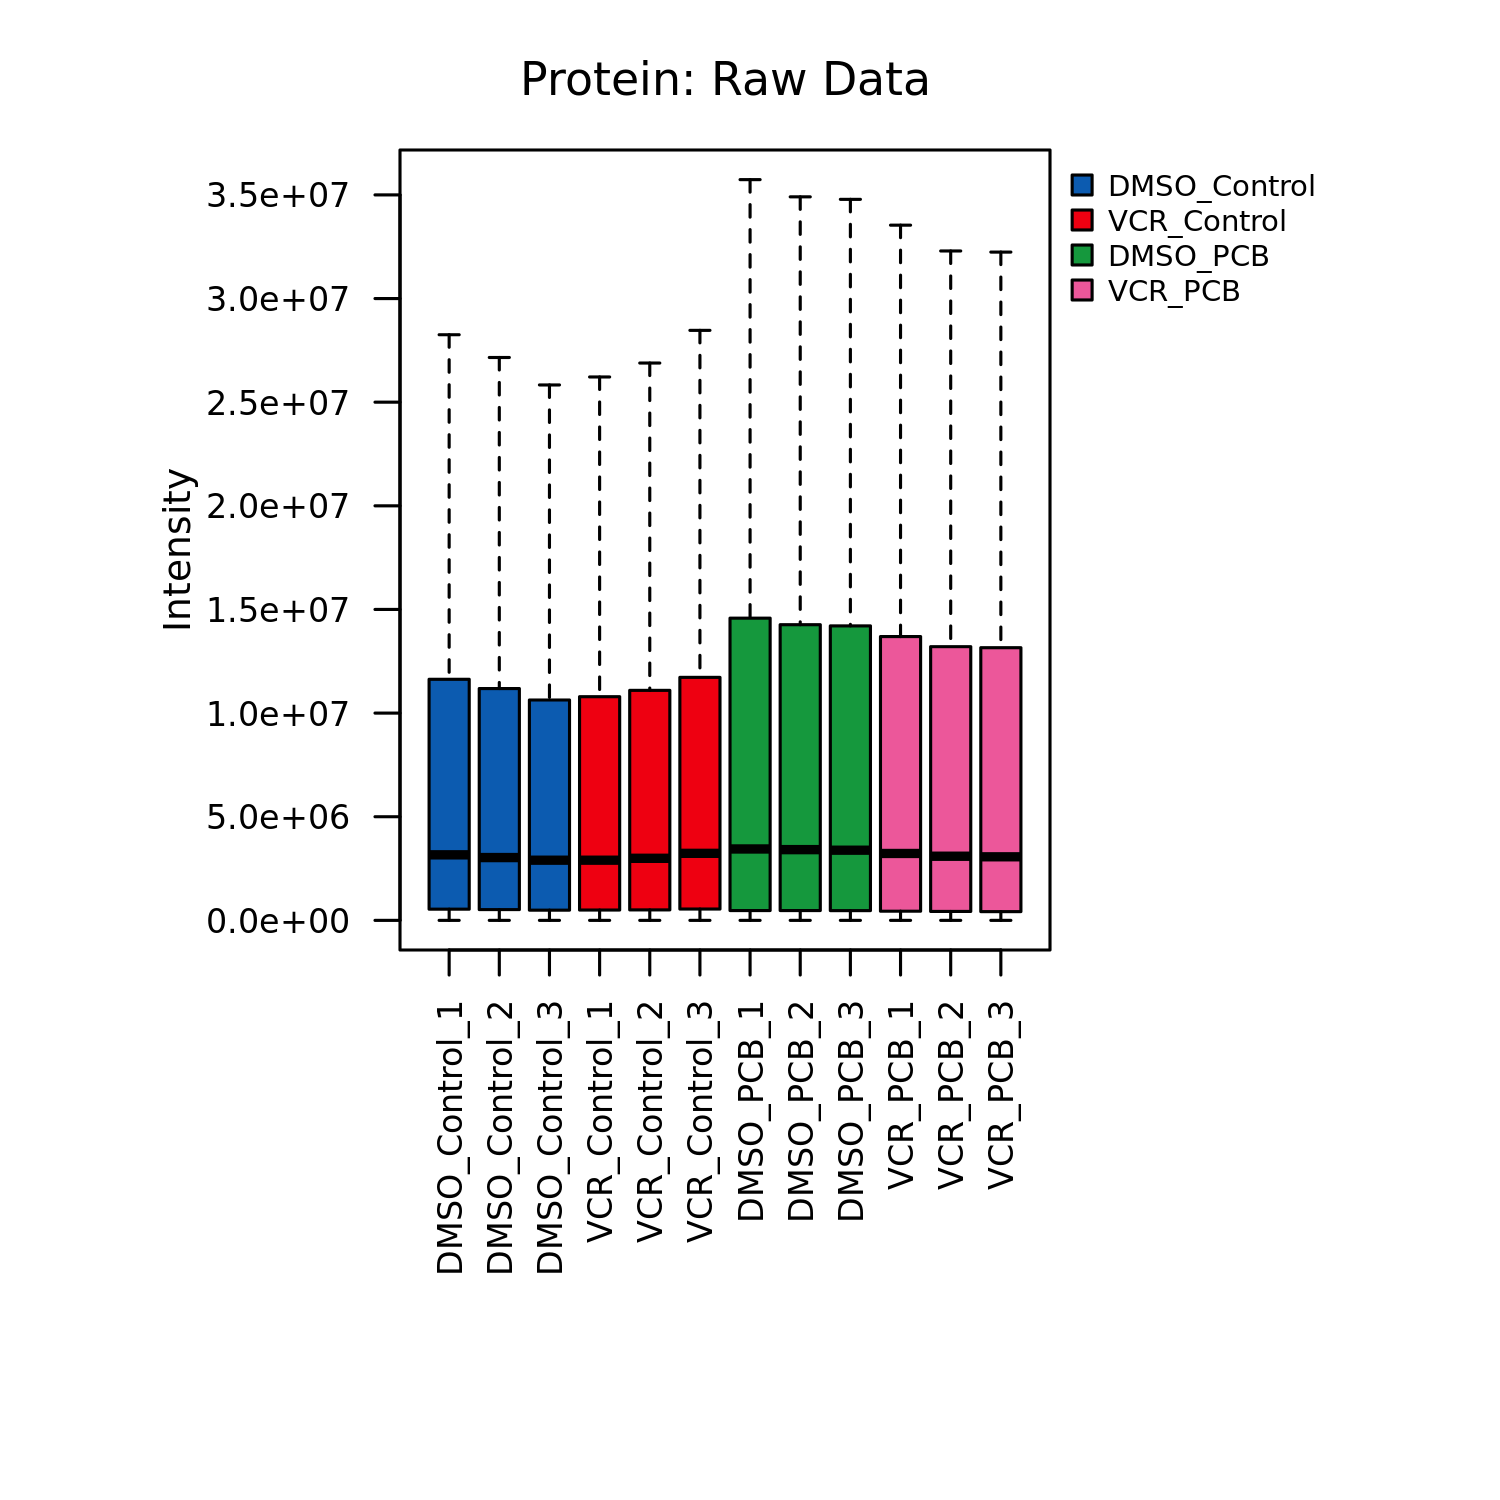

In [15]:
### **3.2.1 QC Plots - Raw**

## QC PLOTS: RAW DATA

boxplotRawData(rawData  = subProtein$subData, 
               targets  = subProtein$subTargets, 
               title    = paste("Protein: ","Raw Data",sep=""),
               file     = file.path(figs.dir, "rawBoxplot.png"), 
               legend   = TRUE, 
               inset    = -0.43,
               save     = TRUE,
               enrich   = "protein")

violinRawData(rawData   = subProtein$subData, 
              targets   = subProtein$subTargets, 
              title     = paste("Protein: ","Raw Data",sep=""),
              file      = file.path(figs.dir, "rawViolin.png"),
              legend    = TRUE, 
              inset     = -0.43, 
              save      = TRUE, 
              enrich    = "protein")


## RAW QC PLOTS
images <- list.files(path=figs.dir, pattern="raw", full.name=TRUE); images

library(IRdisplay)
display_png(file='protein_analysis/02_quality_control/rawBoxplot.png')

#knitr::include_graphics(images)

### **5.2 Filtering**

In [16]:
##--------------------------
##   FILTERING THRESHOLD 
##--------------------------
## KEEP PROTEINS WITH INTENSITY > 0 IN MIN. X REPLICATES IN Y OR MORE GROUPS

min.reps = 2
min.grps = 1

filterProtein <- filterMyData(rawData  = subProtein$subData,
                              rawAnnot = subProtein$subAnnot, 
                              targets  = subProtein$subTargets, 
                              min.reps = min.reps, 
                              min.grps = min.grps,
                              enrich   = "protein")

##    summary stats:  value
## no_input_samples      12
## no_input_protein    8004
## no_removed_protein   254
## no_filter_protein   7750
## min.reps               2
## min.grps               1


## FILTER ZEROS IN ALL SAMPLES
## filterZero  <- removeZeros(rawData=subProtein$subData)
## [2020-12-28 22:46:53]: 247  entries with zero intensities in all  12  samples removed.
## [2020-12-28 22:46:53]: 7757  row entries retained.

[2021-09-10 12:45:37]: matching input data ...

[2021-09-10 12:45:37]: matching input data ...

[2021-09-10 12:45:37]: extracting proteins with measurements (intensity > 0) in at least 2 samples in 1 or more groups.


summary stats:                    value
no_filter_proteins   7750
no_input_proteins    8004
no_input_samples       12
no_removed_proteins   254
min.grps                1
min.reps                2




[2021-09-10 12:45:37]: matching input data ...
[1] "[2021-09-10 12:54:22] [02]  box plot :  protein_analysis/02_quality_control/filteredBoxplot.png"


png 
  2

[2021-09-10 12:45:37]: matching input data ...
[1] "[2021-09-10 12:54:23] [02]  violin plot :  protein_analysis/02_quality_control/filteredViolin.png"


png 
  2

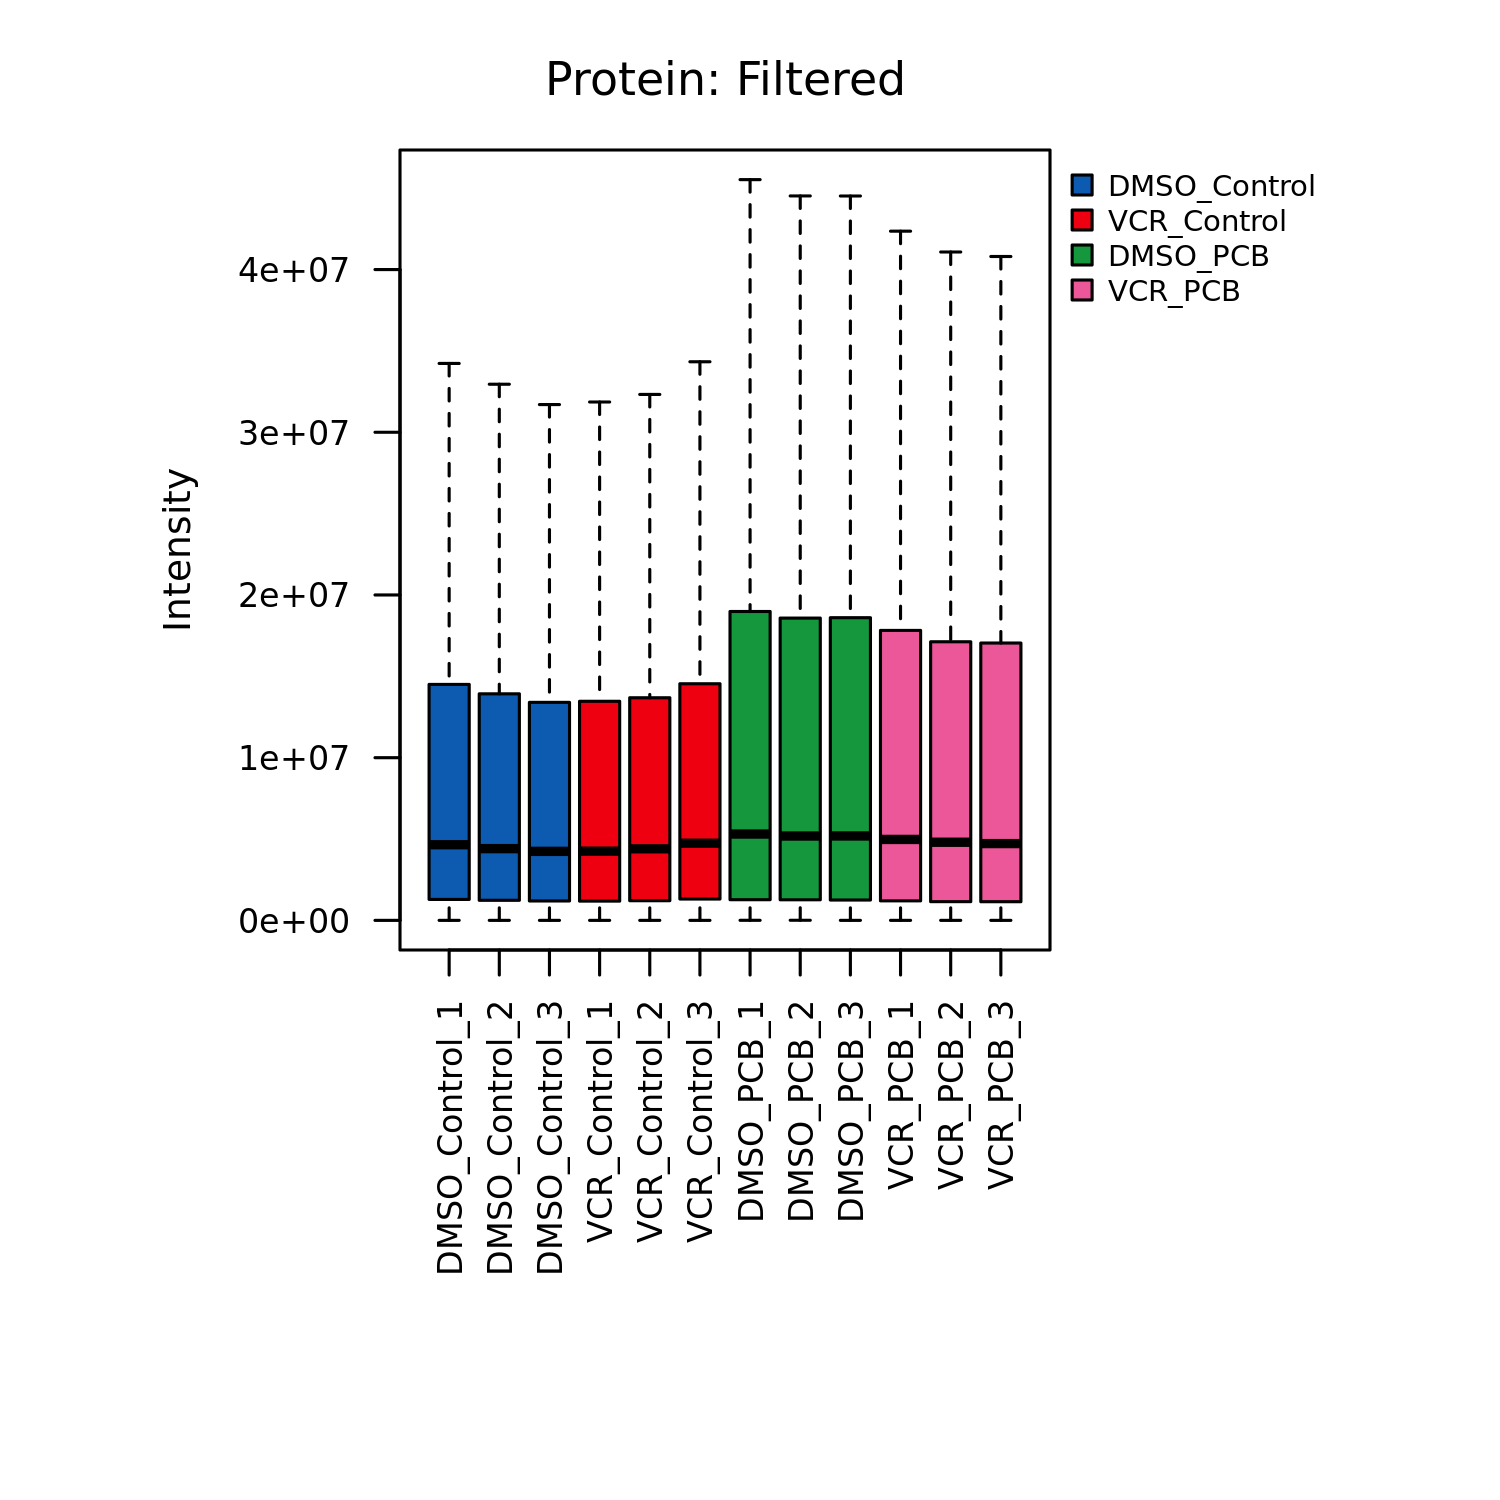

In [20]:
## QC PLOTS: FILTERED DATA

boxplotRawData(rawData  = filterProtein$filterData, 
               targets  = filterProtein$filterTargets, 
               title    = paste("Protein: ","Filtered",sep=""),
               legend   = TRUE, 
               inset    = -0.43, 
               file     = file.path(figs.dir, "filteredBoxplot.png"), 
               save     = TRUE,
               enrich   = "protein")

violinRawData(rawData   = filterProtein$filterData, 
              targets   = filterProtein$filterTargets, 
              title     = paste("Protein: ","Filtered",sep=""),
              file      = file.path(figs.dir, "filteredViolin.png"), 
              legend    = TRUE, 
              inset     = -0.43, 
              save      = TRUE, 
              enrich    = "protein")


## FILTERED QC PLOTS
#images <- list.files(path=figs.dir, pattern="filtered", full.name=TRUE); images

display_png(file='protein_analysis/02_quality_control/filteredBoxplot.png')
#display_png(file='protein_analysis/02_quality_control/filteredViolin.png')

#knitr::include_graphics(images)

### **5.3 Normalization**

In [21]:
##----------------------
##   NORMALIZE DATA
##----------------------
normProtein <- normMyData(filterData  = filterProtein$filterData, 
                          filterAnnot = filterProtein$filterAnnot, 
                          targets     = filterProtein$filterTargets, 
                          enrich      = "protein")


list.files(path="./data/protein_data", pattern=".csv")
list.files(path=dat.dir, pattern=".csv")

[2021-09-10 12:45:37]: matching input data ...

[2021-09-10 12:45:37]: matching input data ...
[2021-09-10 12:45:37]: normalizing data ...



[1] "001_protein_raw_extract.csv" "002_protein_raw_annot.csv"  
[3] "003_protein_raw_data.csv"    "protein_cycloess_none.csv"

[1] "protein_annotation.csv"      "protein_intensities.csv"    
[3] "protein_sample_metadata.csv"

In [22]:
## QC PLOTS: NORMALIZED DATA

proteiNormPlots(normList  = normProtein$normList, 
                targets   = normProtein$normTargets, 
                prefix    = NULL, 
                method    = NULL, 
                dir       = figs.dir, 
                save      = TRUE, 
                enrich    = "protein")


list.files(path=figs.dir)

[1] "[2021-09-10 12:55:01] [01]  PCV plot :  protein_analysis/02_quality_control/PCVplot.png"
[1] "[2021-09-10 12:55:03] [02]  PMAD plot : protein_analysis/02_quality_control/PMADplot.png"
[1] "[2021-09-10 12:55:03] [03]  PEV plot : protein_analysis/02_quality_control/PEVplot.png"
[1] "[2021-09-10 12:55:04] [04]  COR plot : protein_analysis/02_quality_control/CORplot.png"
[1] "[2021-09-10 12:55:04] [05]  LogRatio plot : protein_analysis/02_quality_control/LogRatoplot.png"
[1] "[2021-09-10 12:55:05] [05]  LogRatio plot : protein_analysis/02_quality_control/LogRatoplot-zoom.png"
[1] "[2021-09-10 12:55:05] [06]  totInten plot: protein_analysis/02_quality_control/TotIntenplot.png"
[1] "[2021-09-10 12:55:06] [07]  NaHM plot :  protein_analysis/02_quality_control/NaHMplot.png"


Warning message:
“Heatmap/annotation names are duplicated: Miss. val. pattern”
Warning message:
“Heatmap/annotation names are duplicated: Miss. val. pattern, Miss. val.
pattern”


[1] "[2021-09-10 12:55:15] [01]  PCV plot : "
[1] "[2021-09-10 12:55:15] [02]  PMAD plot :"
[1] "[2021-09-10 12:55:15] [03]  PEV plot : "
[1] "[2021-09-10 12:55:15] [04]  COR plot : "


[1] "CORplot.png"                   "filteredBoxplot.png"          
 [3] "filteredViolin.png"            "LogRatoplot-zoom.png"         
 [5] "LogRatoplot.png"               "NaHMplot.png"                 
 [7] "PCVplot.png"                   "PEVplot.png"                  
 [9] "PMADplot.png"                  "protein-proteiNorm-matrix.png"
[11] "rawBoxplot.png"                "rawViolin.png"                
[13] "TotIntenplot.png"

[1] "protein_analysis/02_quality_control/protein-proteiNorm-matrix.png"

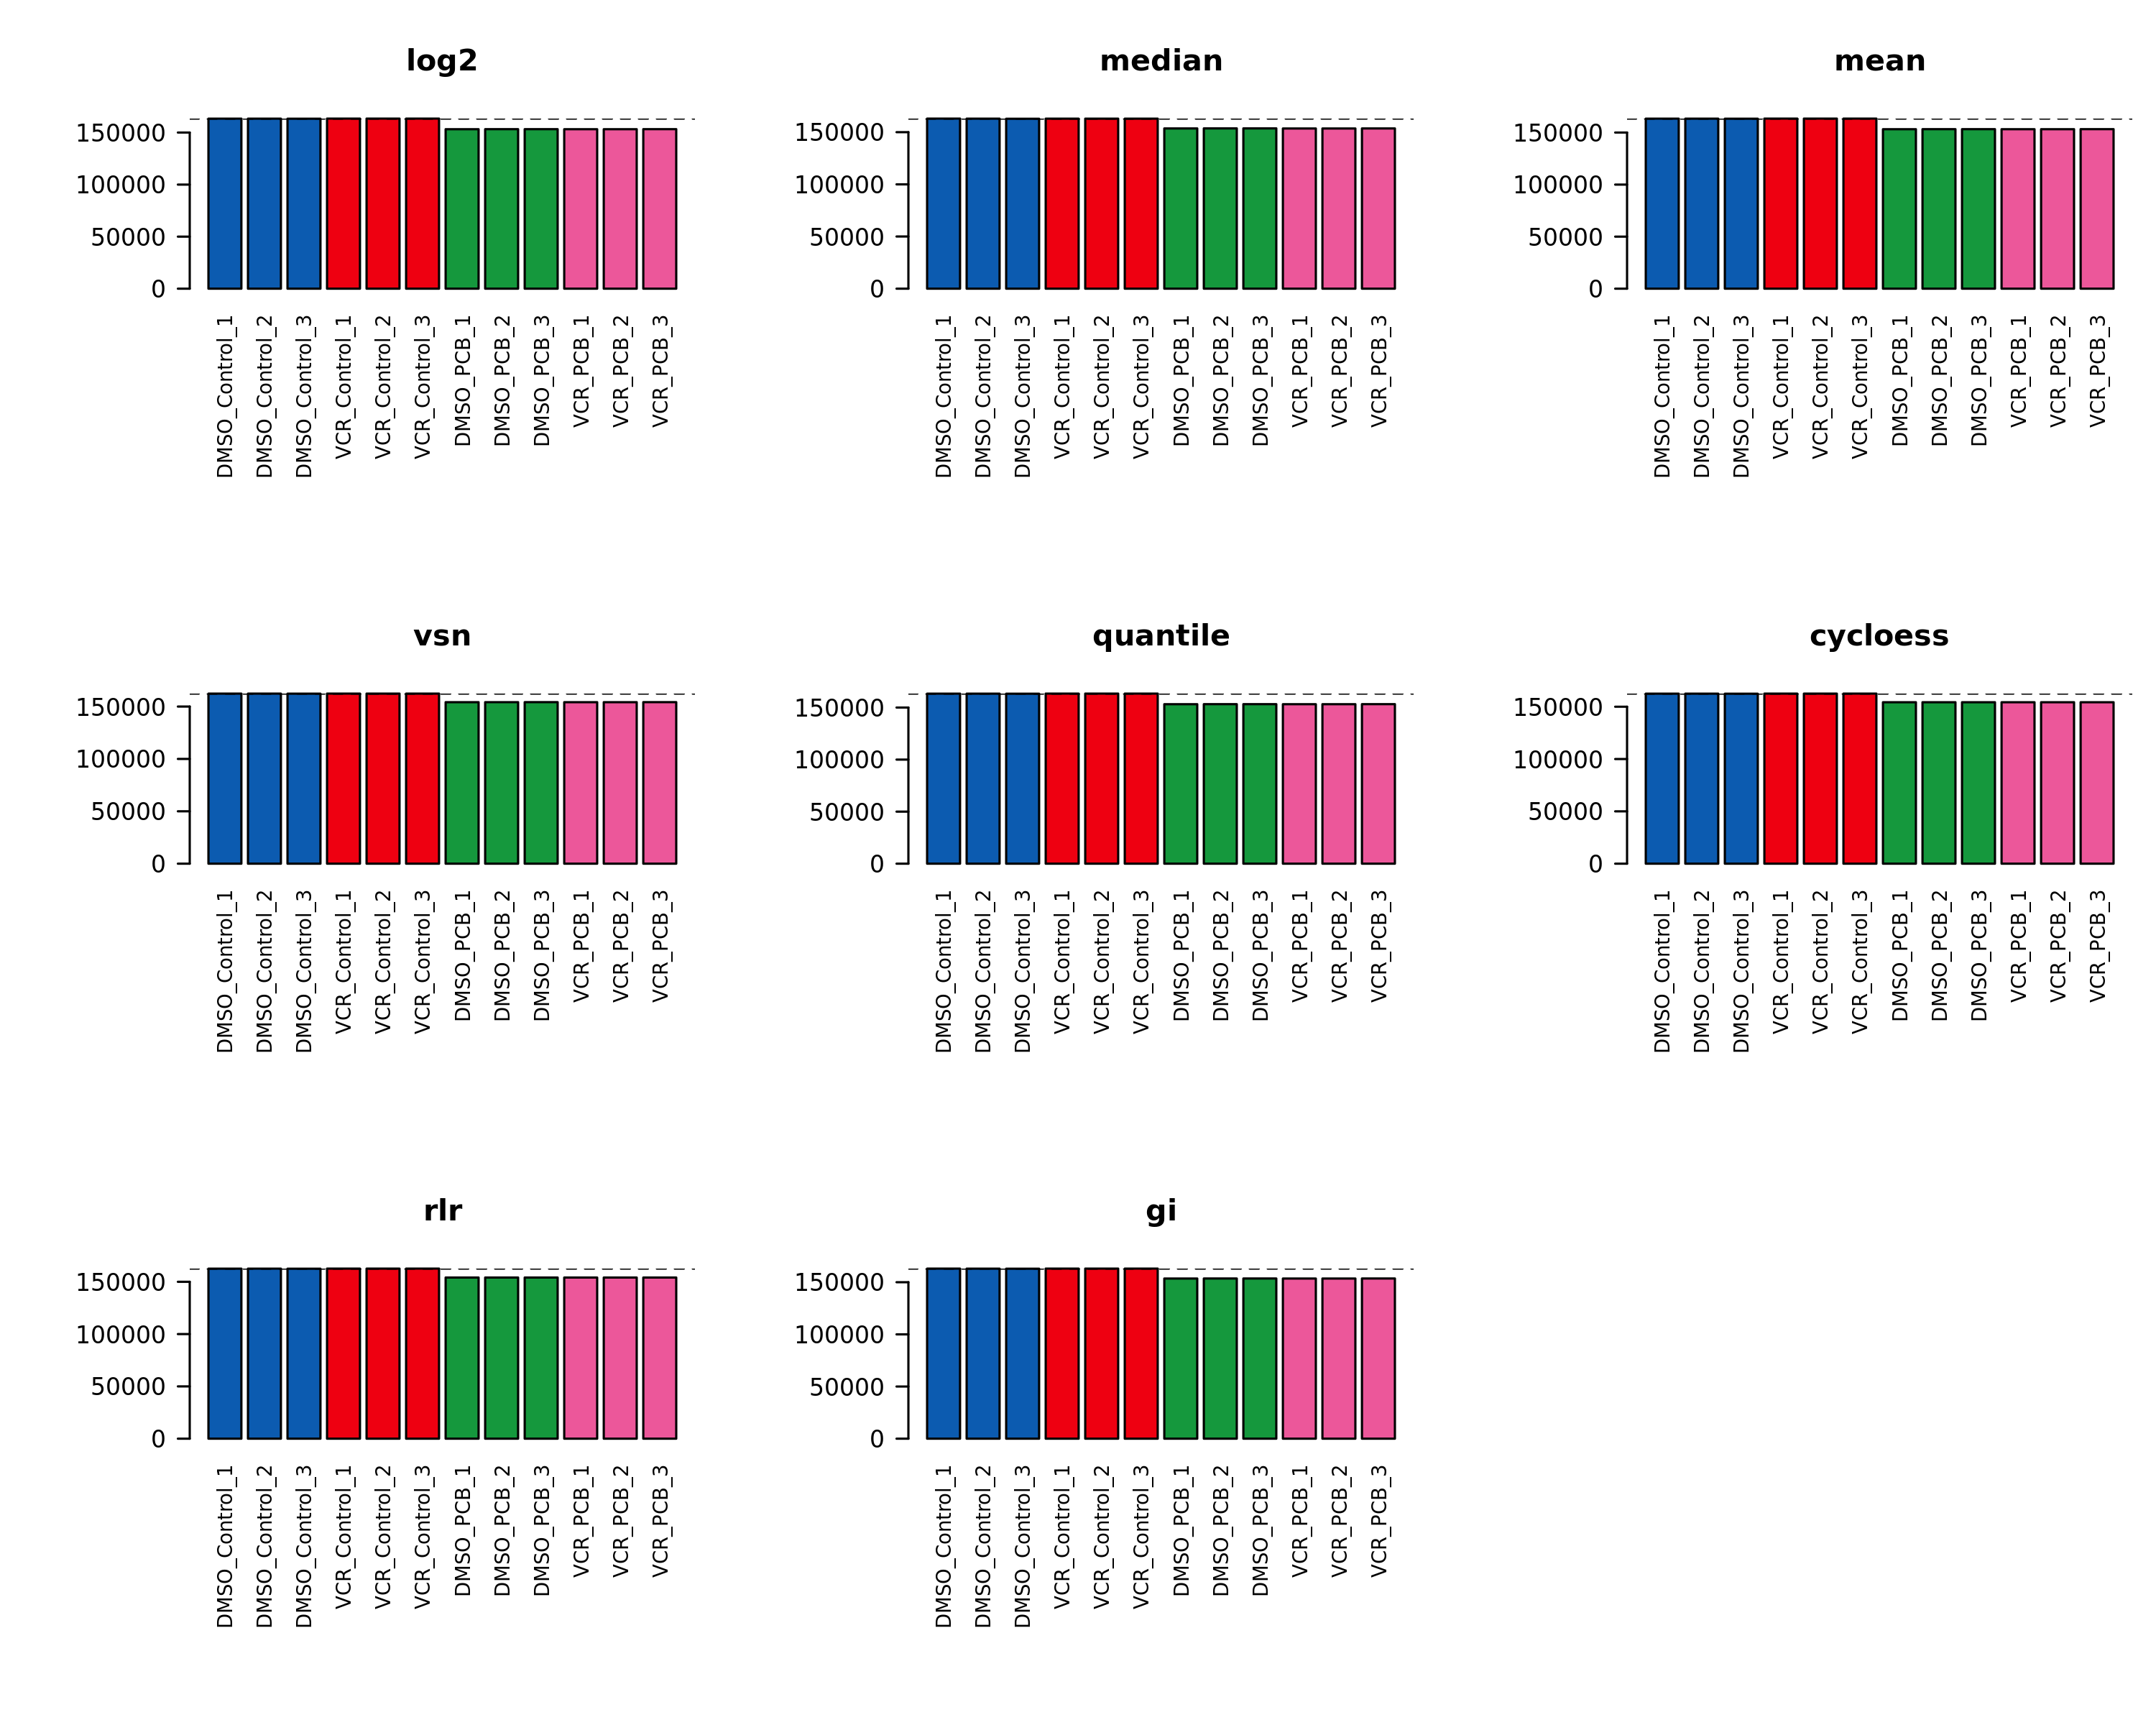

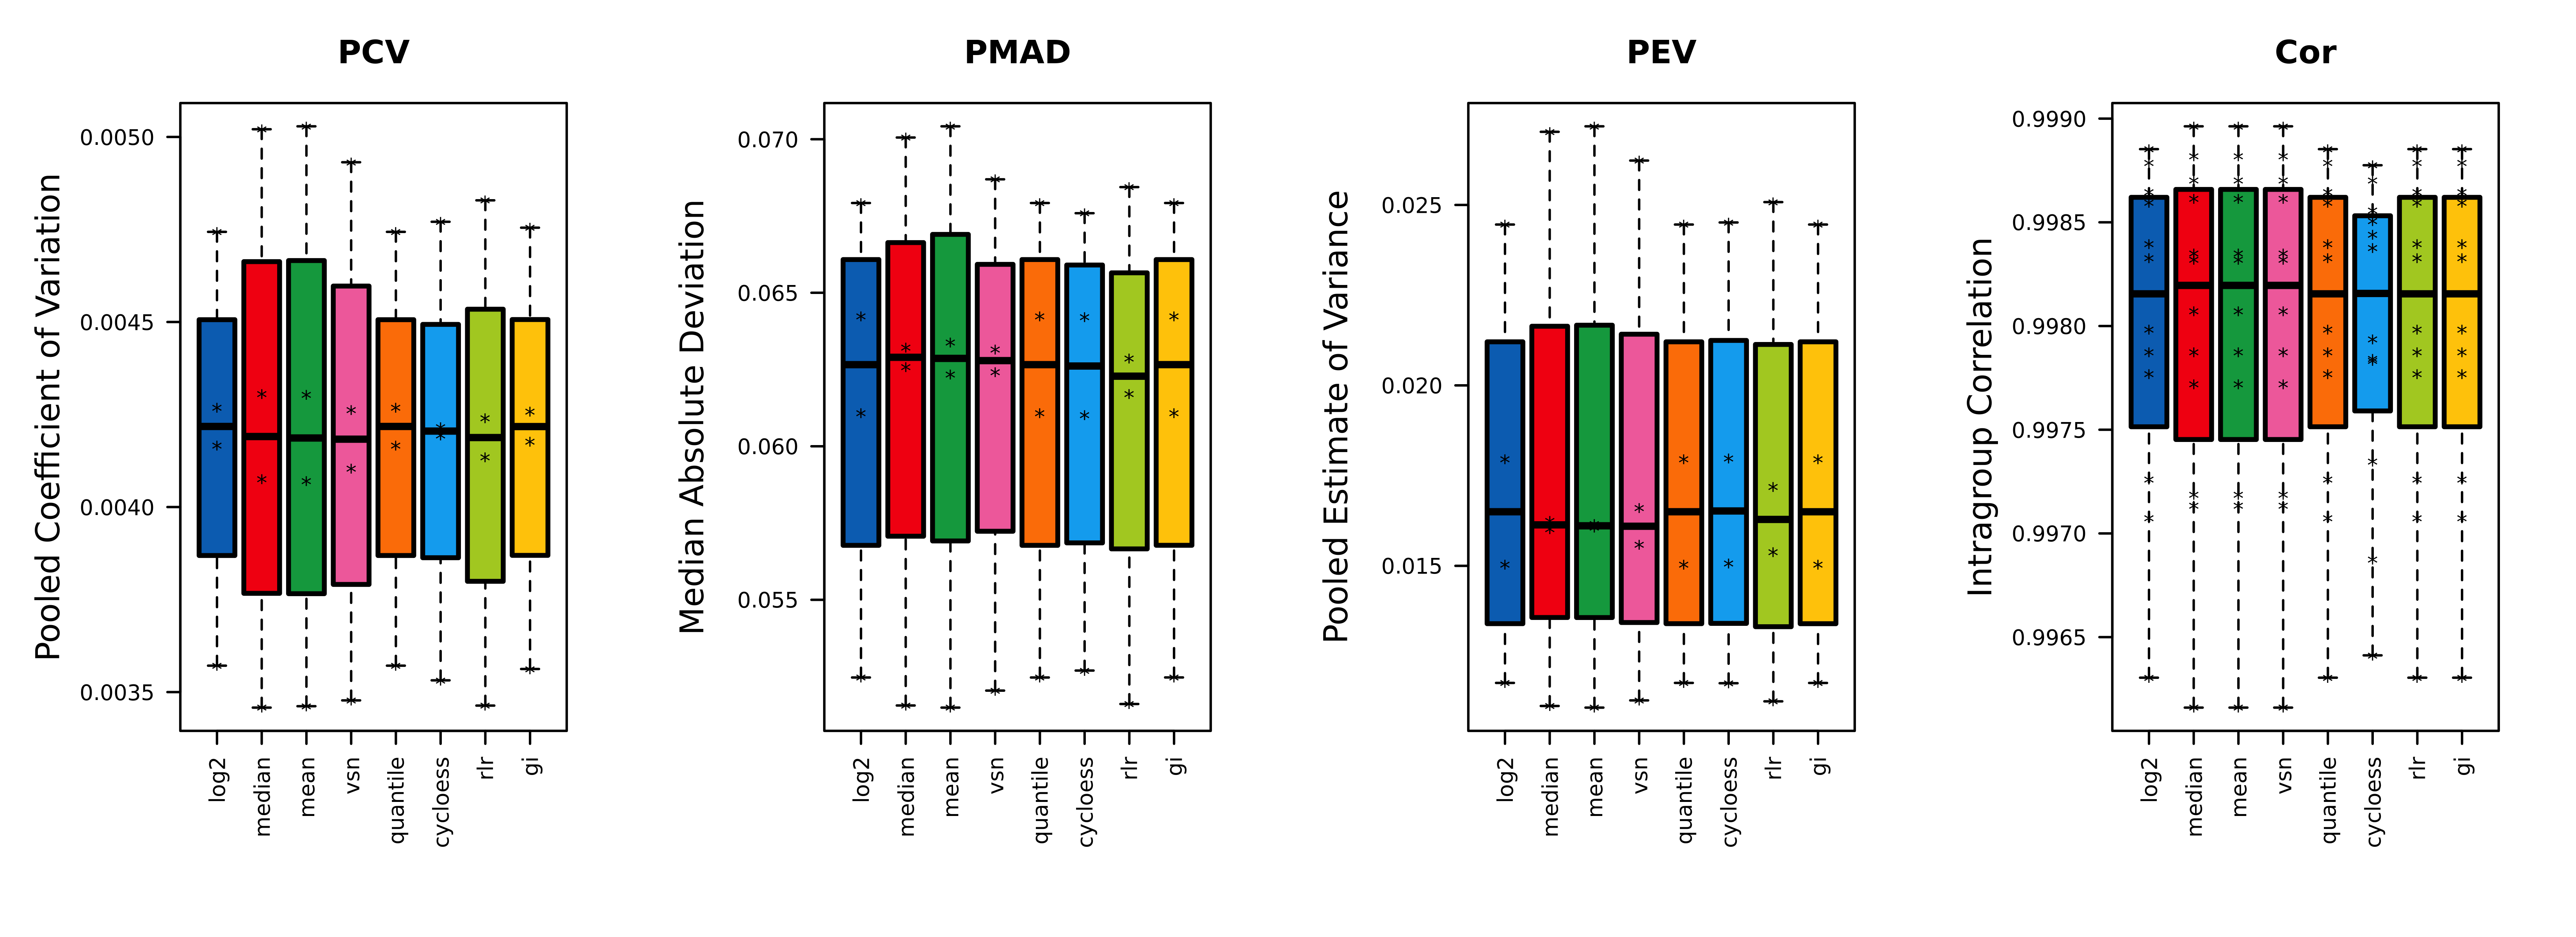

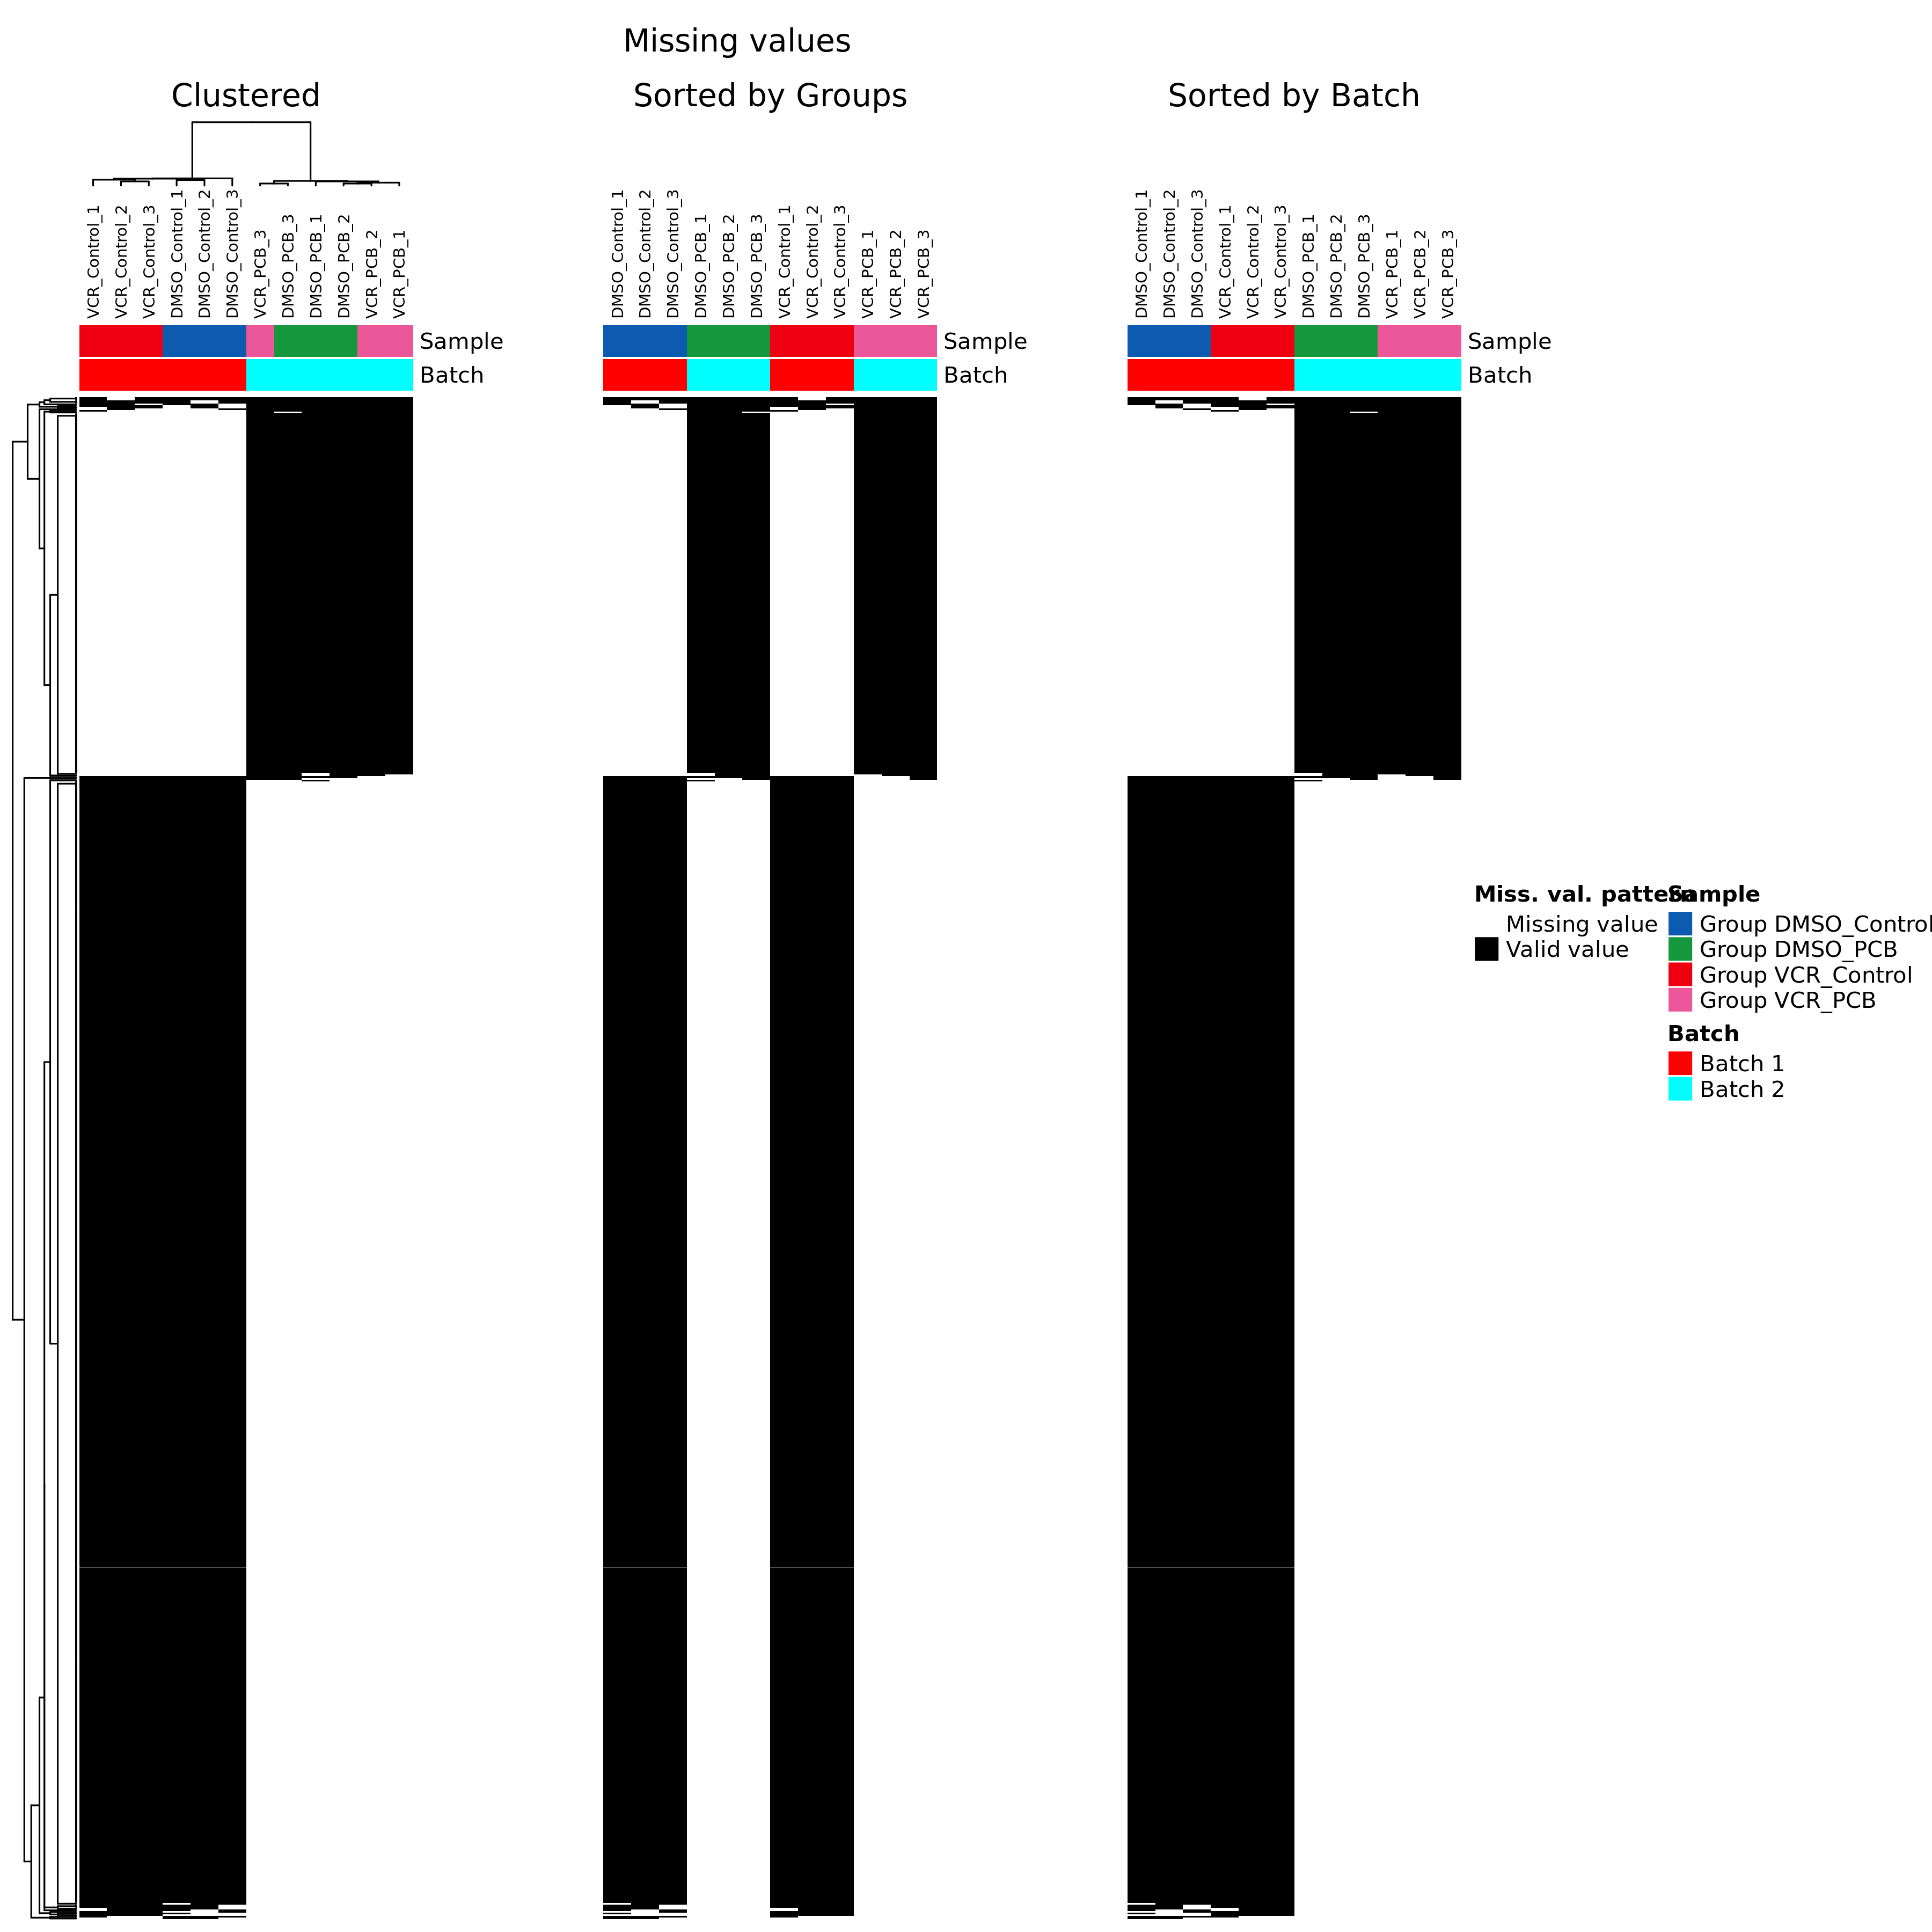

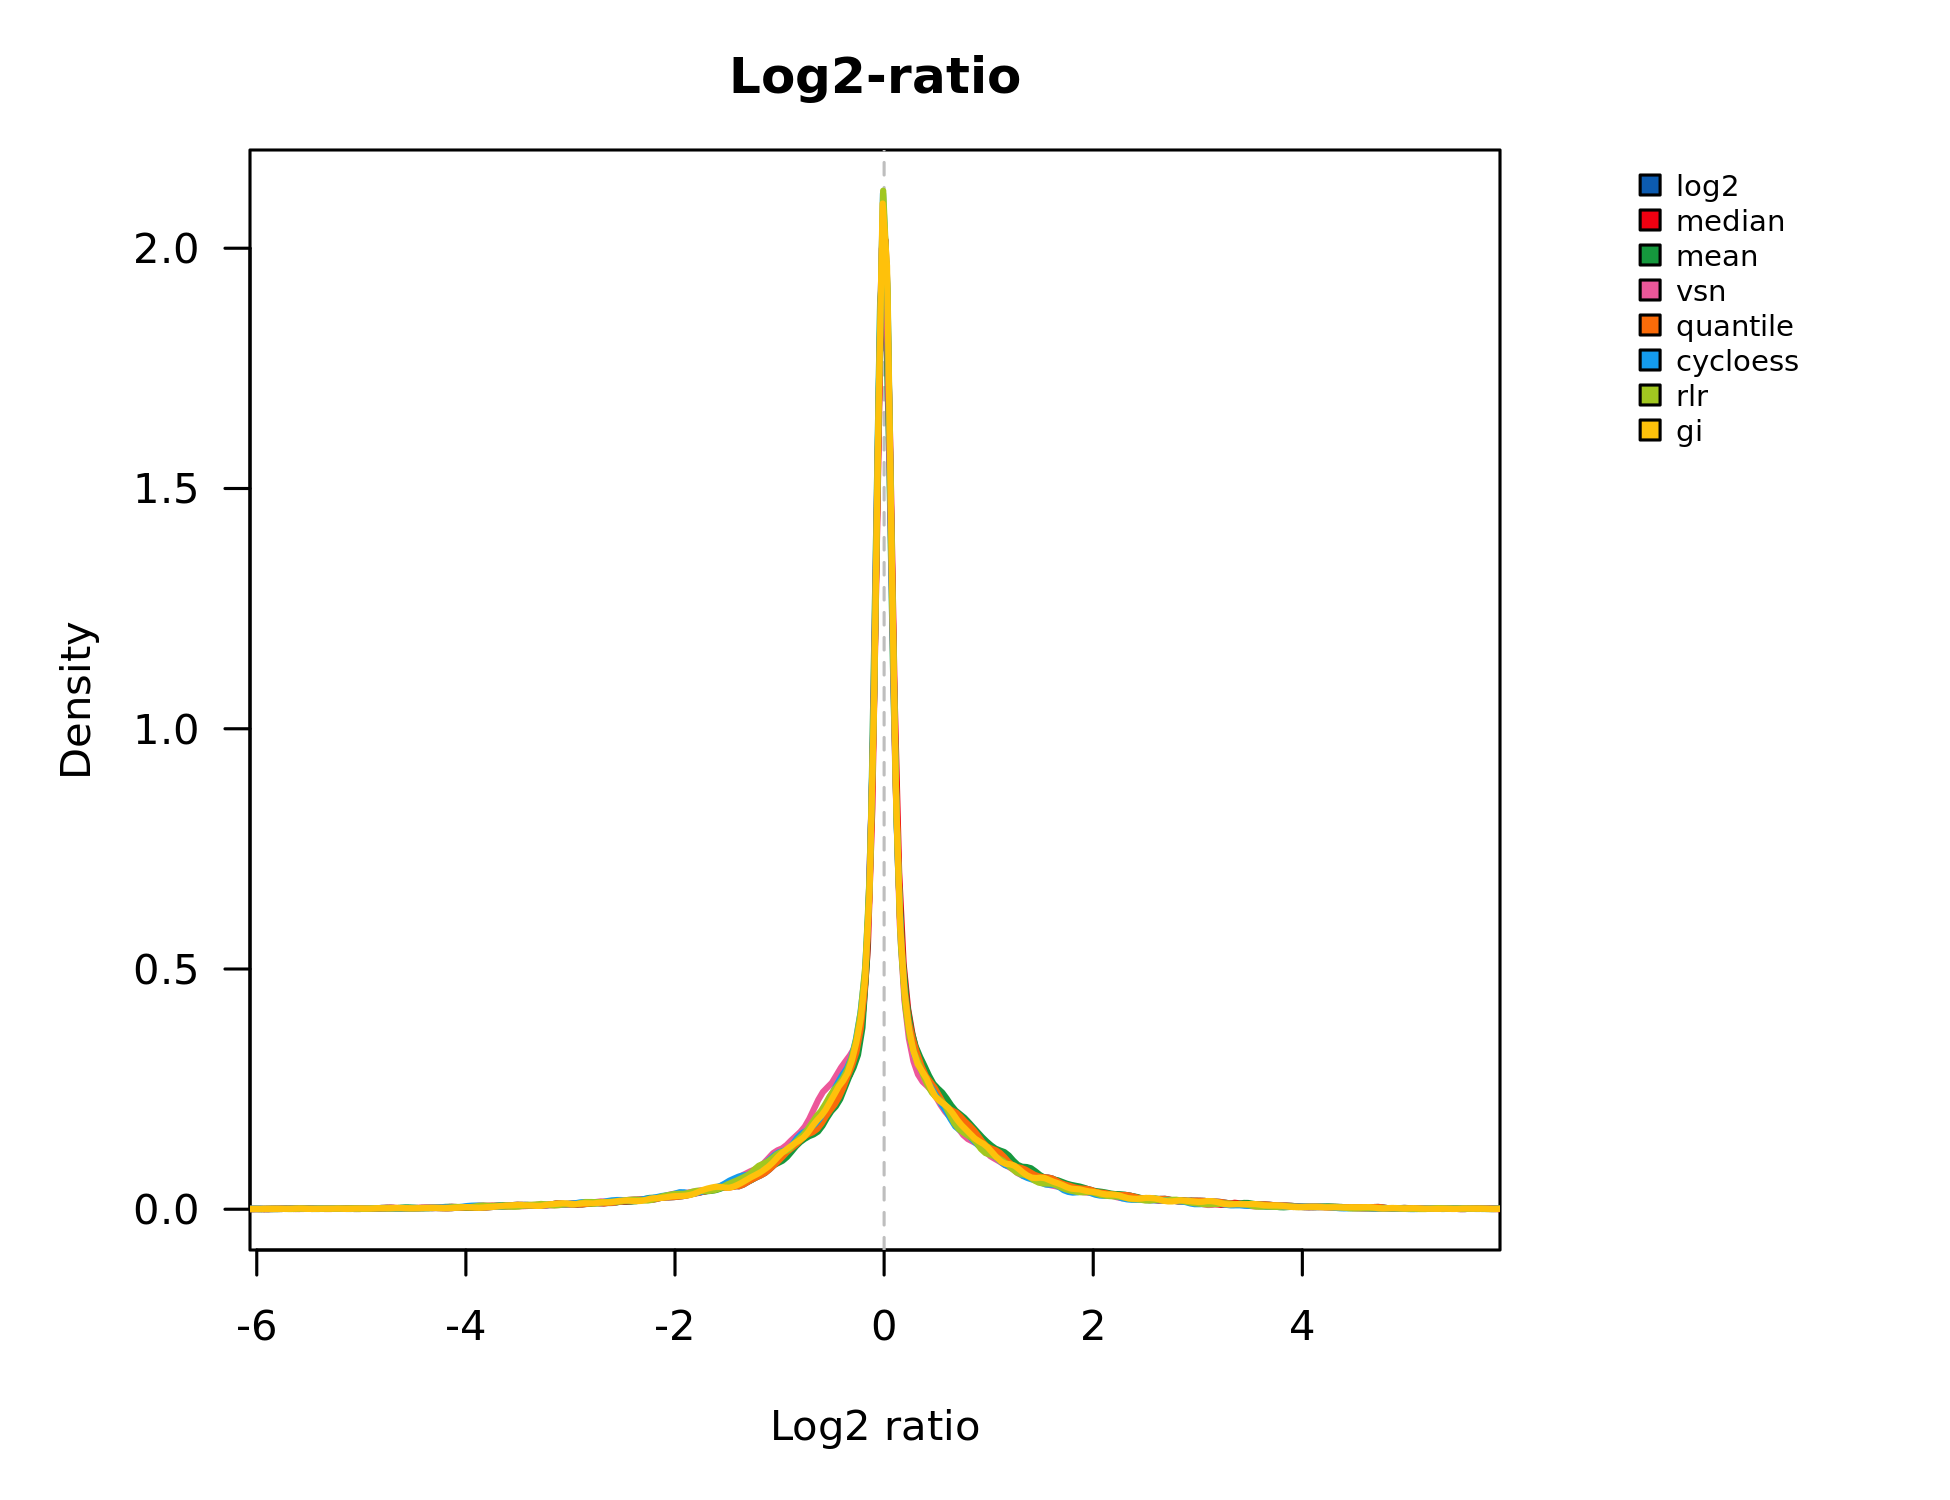

In [27]:
## BOXPLOT MATRIX OF PCV, PEV, PMAD, AND COR

images <- paste(figs.dir, c("protein-proteiNorm-matrix.png"),sep="/");images

display_png(file='protein_analysis/02_quality_control/TotIntenplot.png')
display_png(file='protein_analysis/02_quality_control/protein-proteiNorm-matrix.png')
display_png(file='protein_analysis/02_quality_control/NaHMplot.png')
display_png(file='protein_analysis/02_quality_control/LogRatoplot.png')


#knitr::include_graphics(images)

[1] "protein_analysis/02_quality_control/TotIntenplot.png"

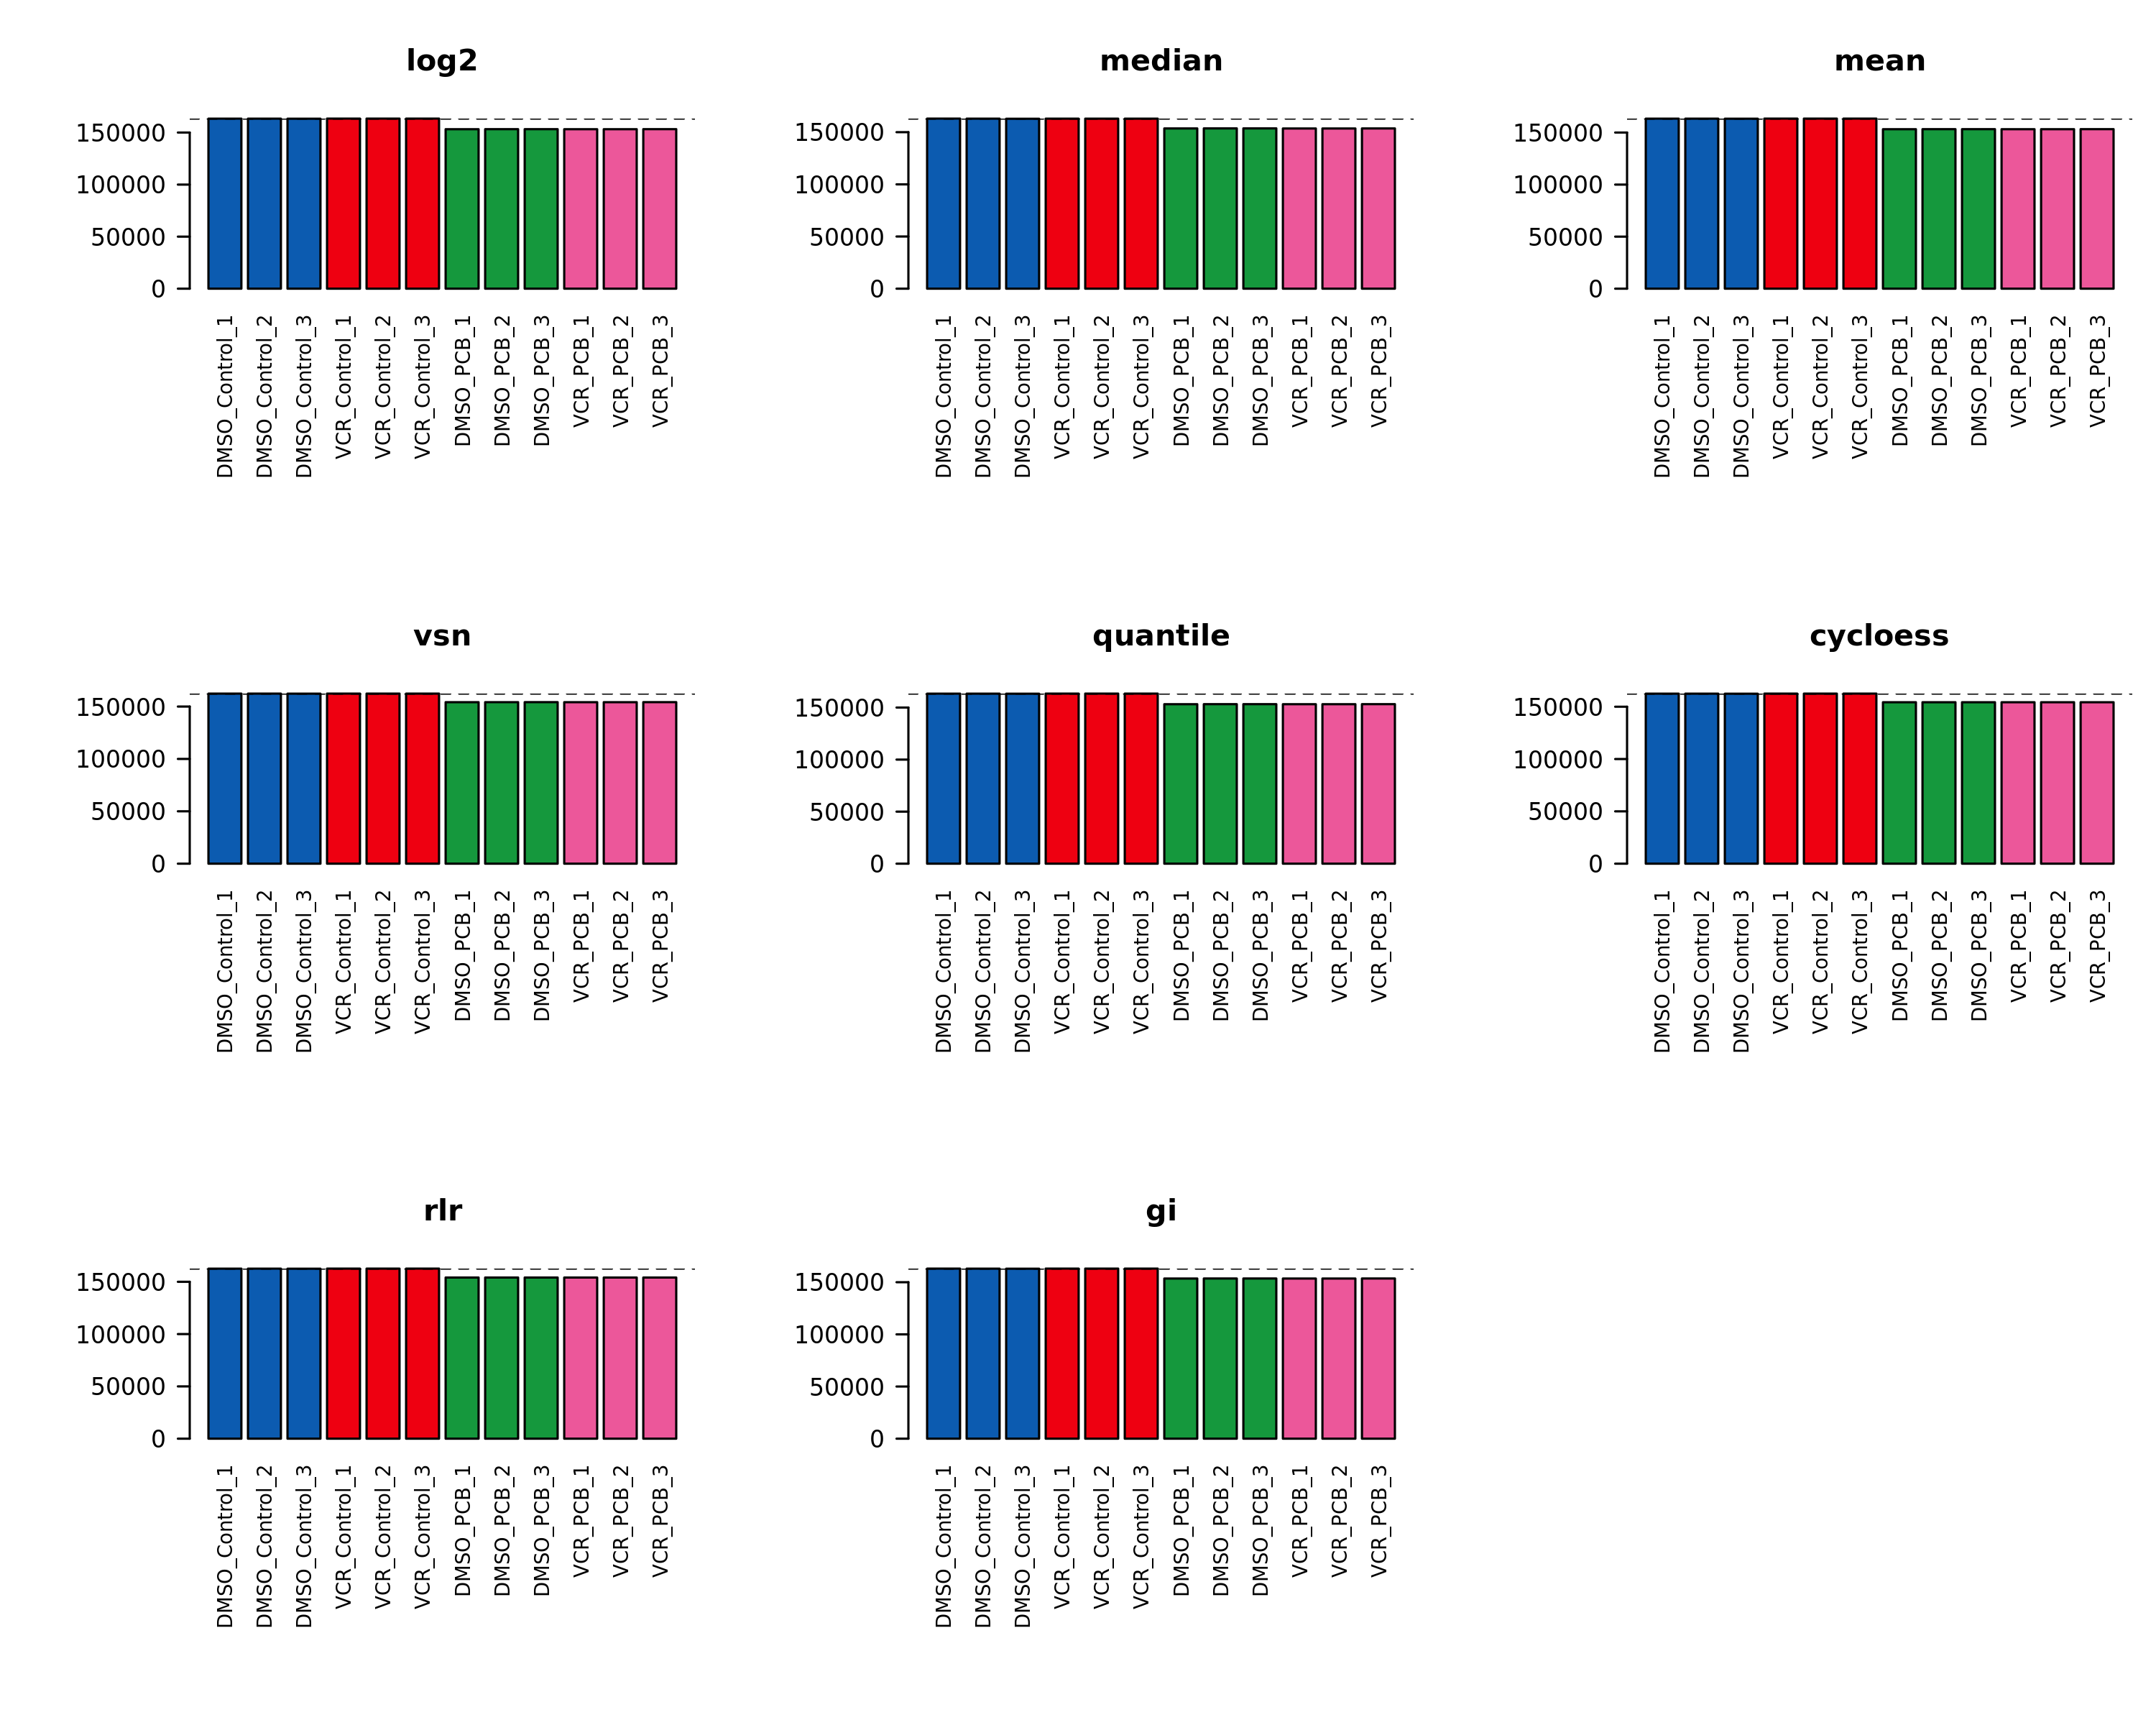

In [26]:
## BOX PLOT MATRIX OF NORMALIZED TOTAL ION CURRENT

images <-paste(figs.dir, c("TotIntenplot.png"),sep="/");images
display_png(file='protein_analysis/02_quality_control/TotIntenplot.png')

In [21]:
## MISSING VALUE HEATMAPS

images <- paste(figs.dir, c("NaHMplot.png"),sep="/")

display_png(file='protein_analysis/02_quality_control/NaHMplot.png')


[1] "protein_analysis/02_quality_control/NaHMplot.png"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       

In [28]:
## SELECT NORMALIZATION AND IMPUTATION METHODS

## norm.methods:   "log2", "median", "mean", "vsn", "quantile", "cycloess", "rlr", "gi"
## impute.methods: "none", "knn", "qrilc", "mindet", "minprob", "min", "zero"

normMethod = "cycloess"
imputeMethod = "none"

[2021-09-10 12:45:37]: matching input data ...
[1] "[2021-09-10 13:03:26] [02]  box plot :  protein_analysis/02_quality_control/normBoxplot.png"


png 
  2

[2021-09-10 12:45:37]: matching input data ...
[1] "[2021-09-10 13:03:26] [02]  violin plot :  protein_analysis/02_quality_control/normViolin.png"


png 
  2

[1] "protein_analysis/02_quality_control/normBoxplot.png"
[2] "protein_analysis/02_quality_control/normViolin.png"

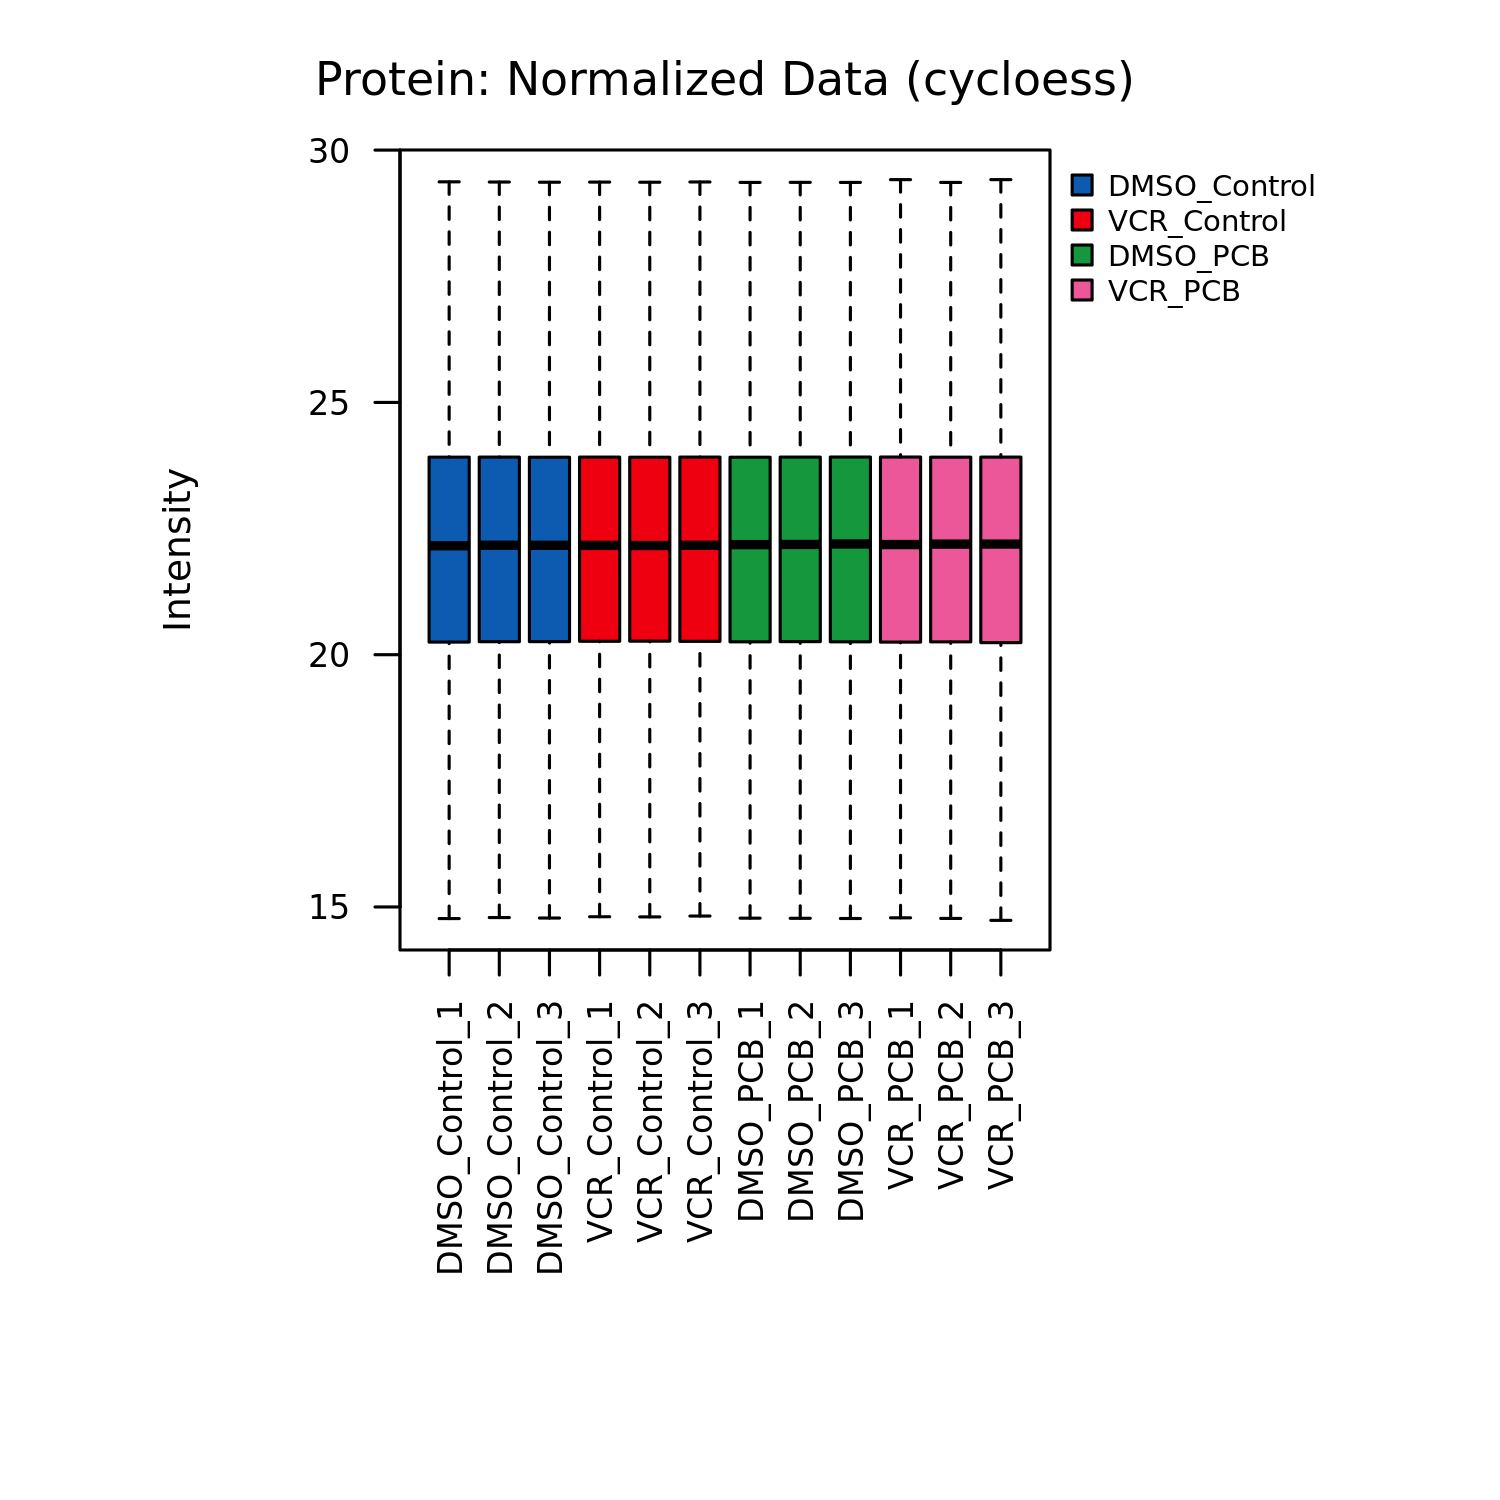

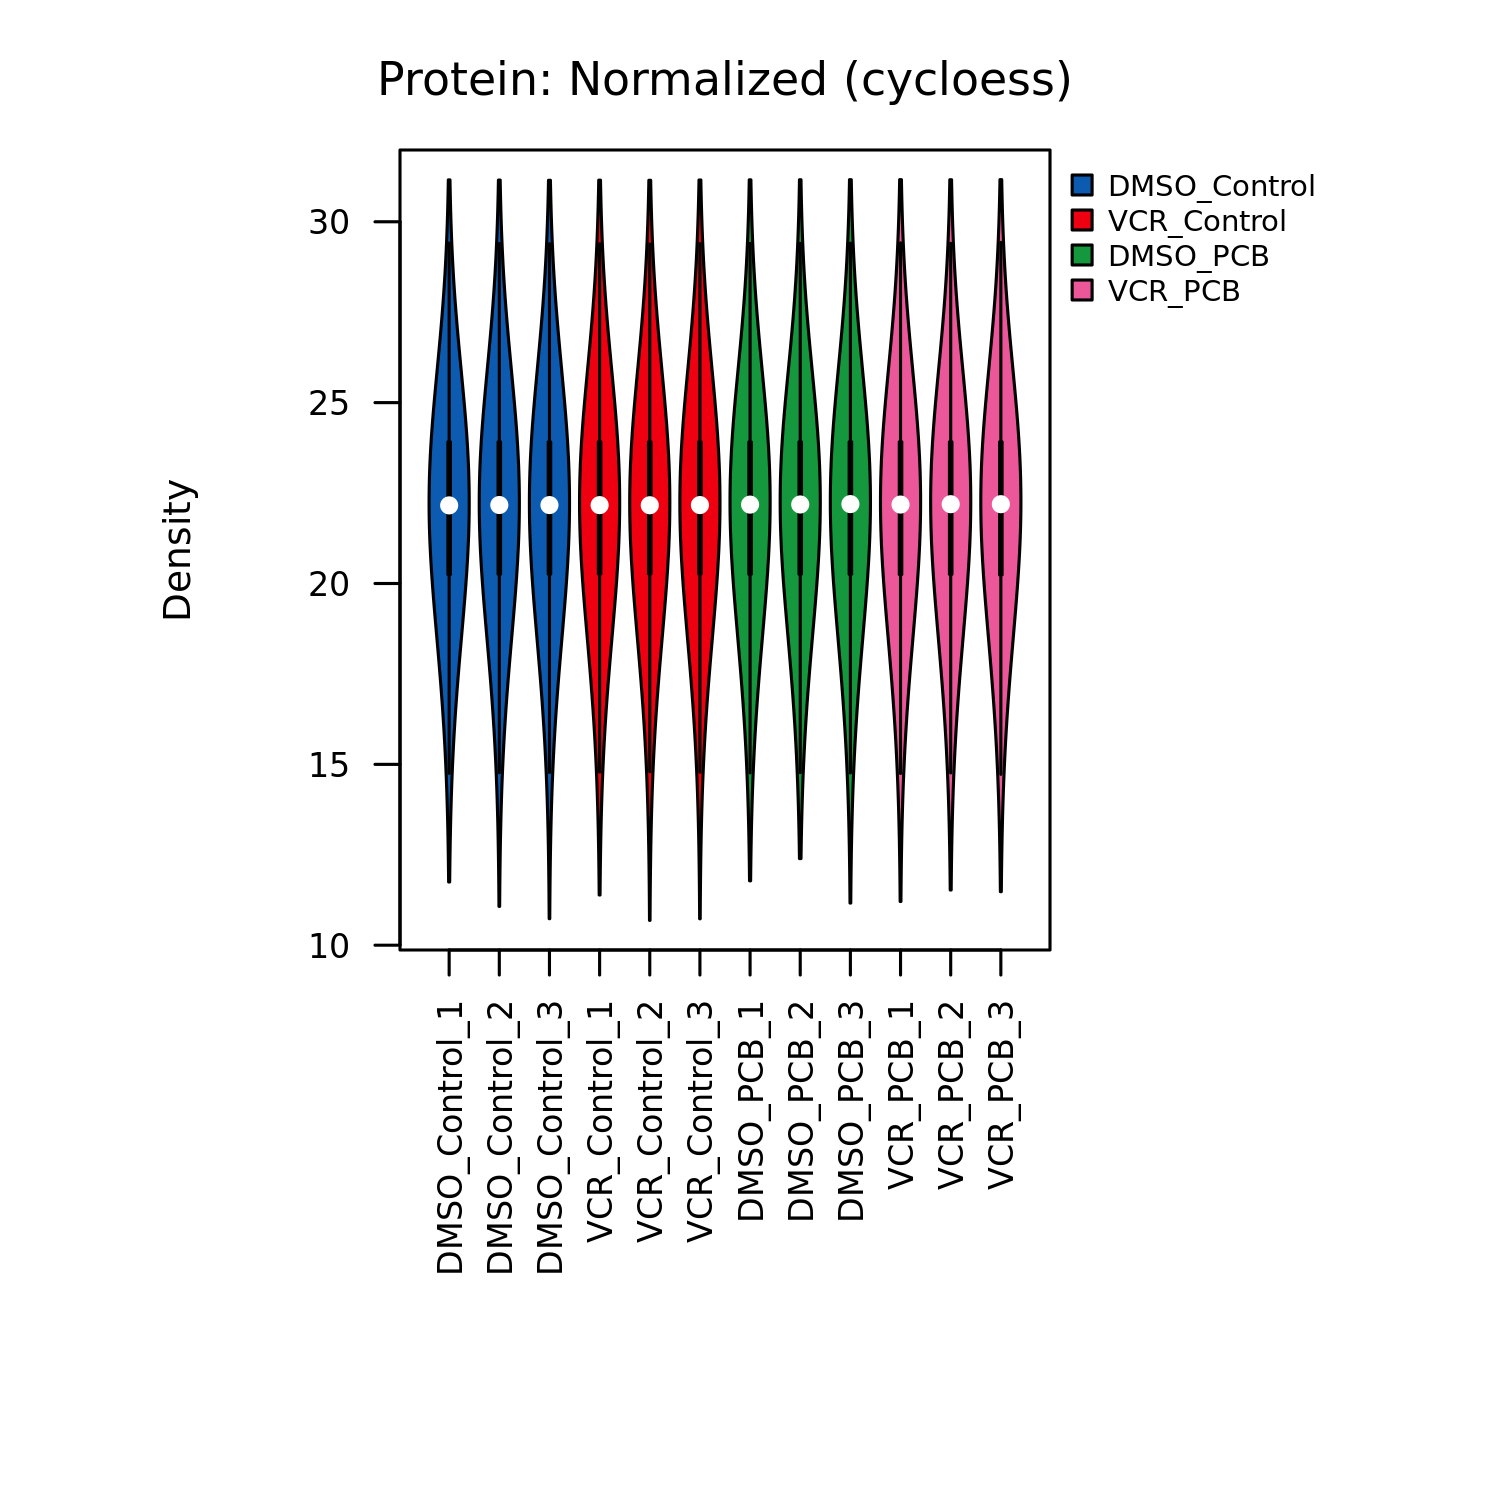

In [30]:
## BOXPLOT AND VIOLIN PLOTS FOR SELECTED NORMALIZATION METHOD

boxplotRawData(rawData  = normProtein$normList[[normMethod]], 
               targets  = normProtein$normTargets, 
               title    = paste("Protein: ", "Normalized Data (", normMethod,")",sep=""),
               legend   = TRUE, inset = -0.43, 
               file     = file.path(figs.dir, "normBoxplot.png"), 
               save     = TRUE,
               enrich   = "protein")

violinRawData(rawData   = normProtein$normList[[normMethod]], 
              targets   = normProtein$normTargets, 
              title     = paste("Protein: ","Normalized (", normMethod,")",sep=""),
              file      = file.path(figs.dir, "normViolin.png"), 
              legend    = TRUE, inset = -0.43, 
              save      = TRUE, 
              enrich    = "protein")


images <- paste(figs.dir, c("normBoxplot.png", "normViolin.png"),sep="/");images

display_png(file='protein_analysis/02_quality_control/normBoxplot.png')
display_png(file='protein_analysis/02_quality_control/normViolin.png')


[1] "[2021-09-10 13:07:55] [09]  plotPCA : cycloess protein_analysis/02_quality_control/PCAplot-cycloess-group.png"
[1] "[2021-09-10 13:07:56] [09]  plotPCA : cycloess protein_analysis/02_quality_control/PCAplot-cycloess-batch.png"
[1] "protein_analysis/02_quality_control/CorHM-cycloess.png"
[1] "[2021-09-10 13:07:56] [08]  CorHM : cycloess protein_analysis/02_quality_control/CorHM-cycloess.png"


[1] "protein_analysis/02_quality_control/PCAplot-cycloess-batch.png"
[2] "protein_analysis/02_quality_control/PCAplot-cycloess-group.png"
[3] "protein_analysis/02_quality_control/CorHM-cycloess.png"

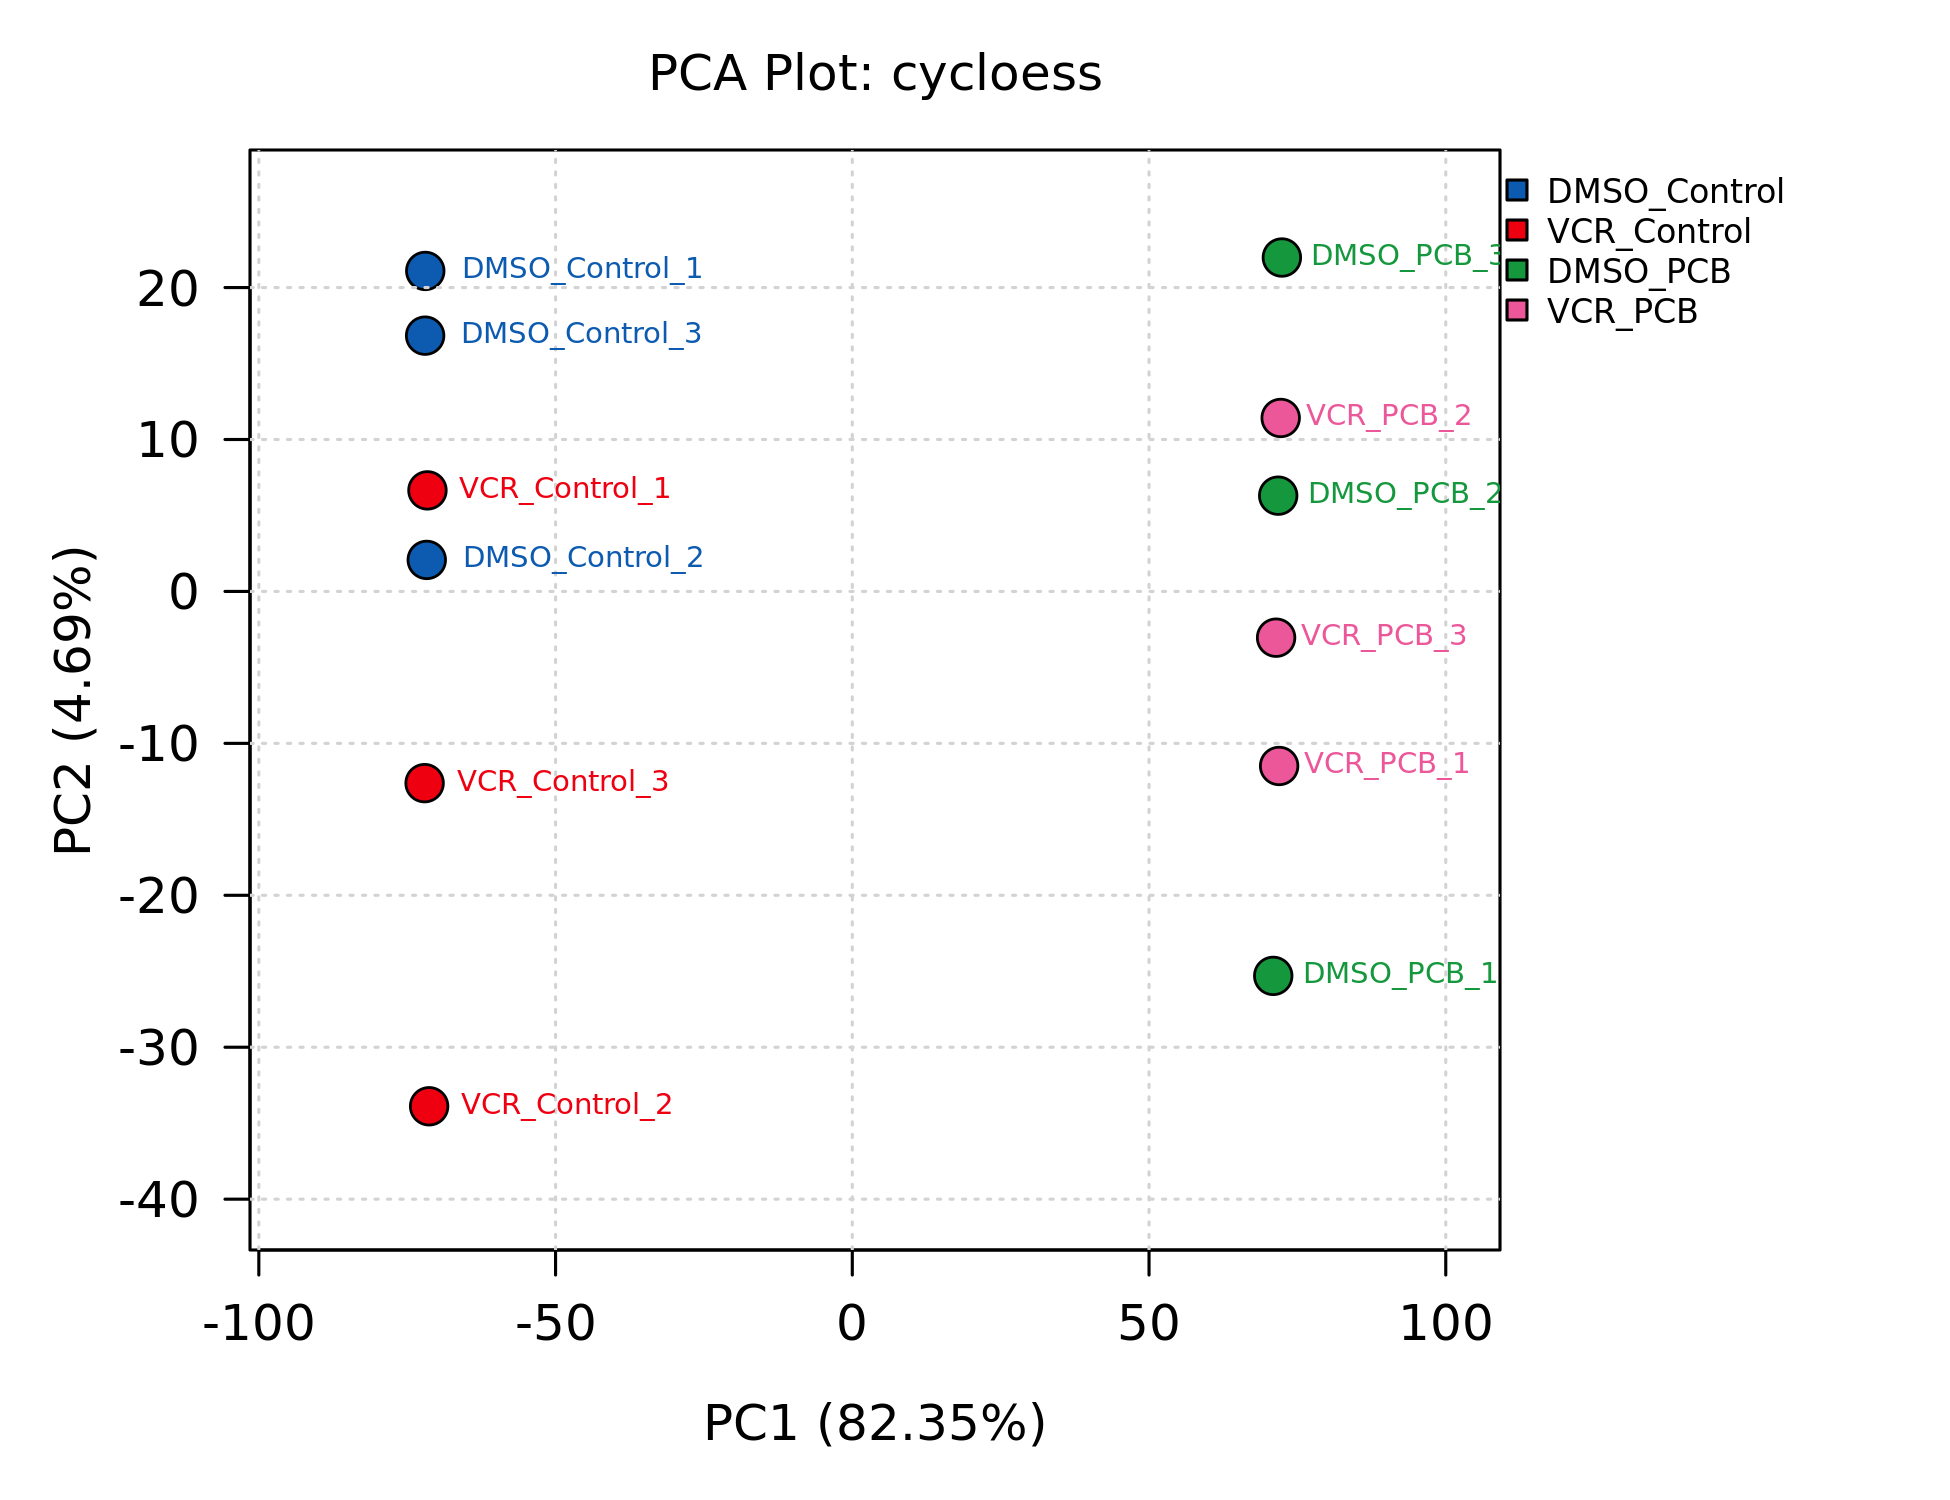

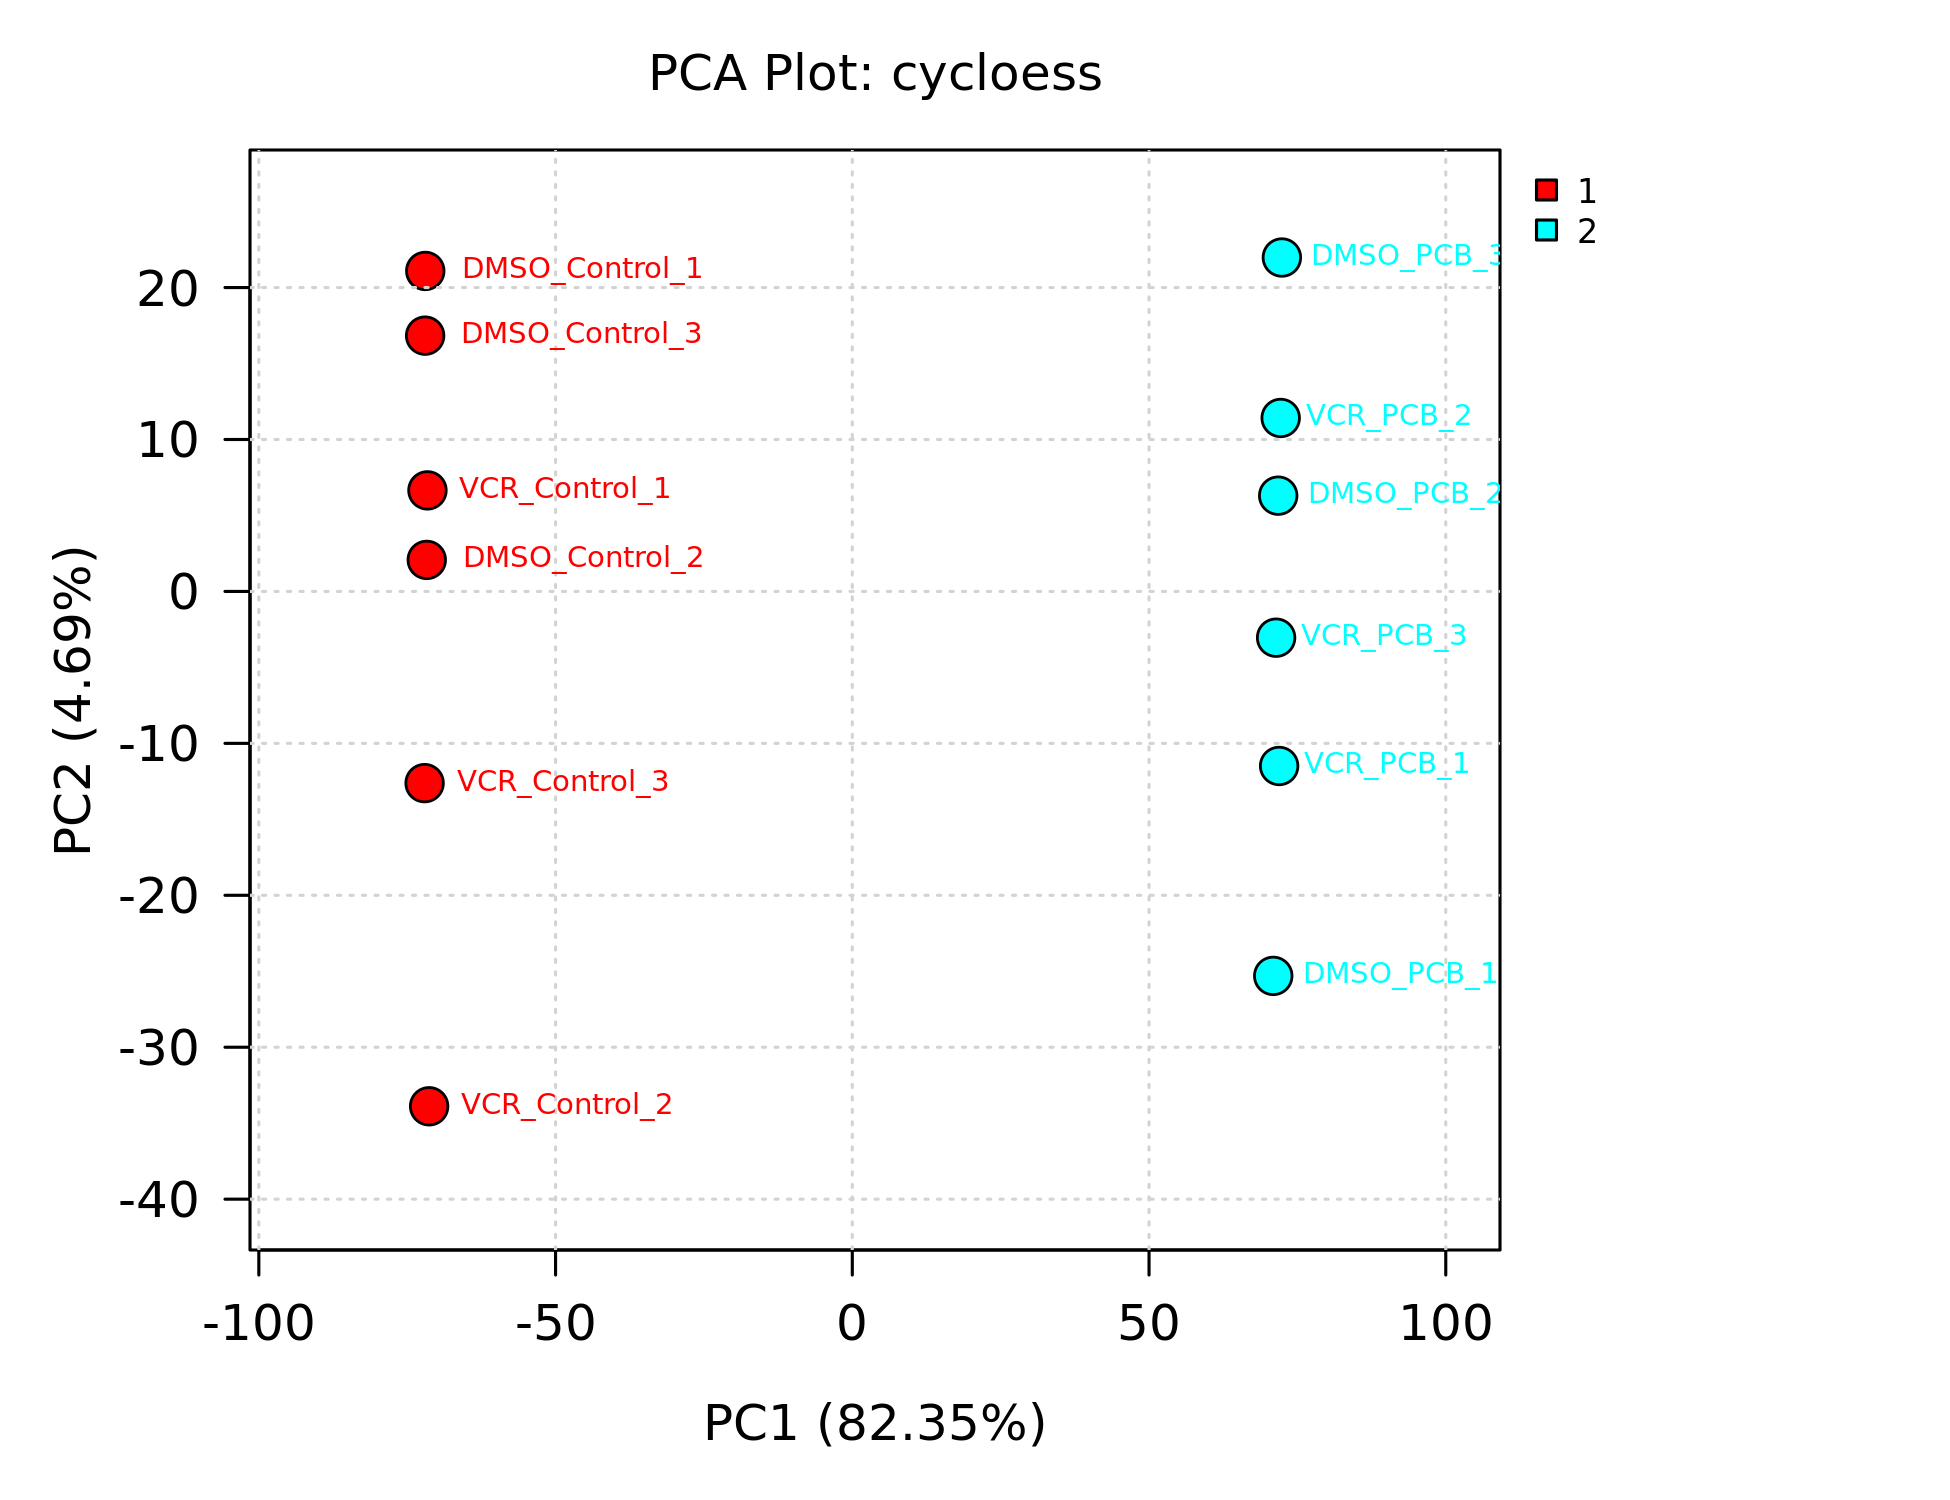

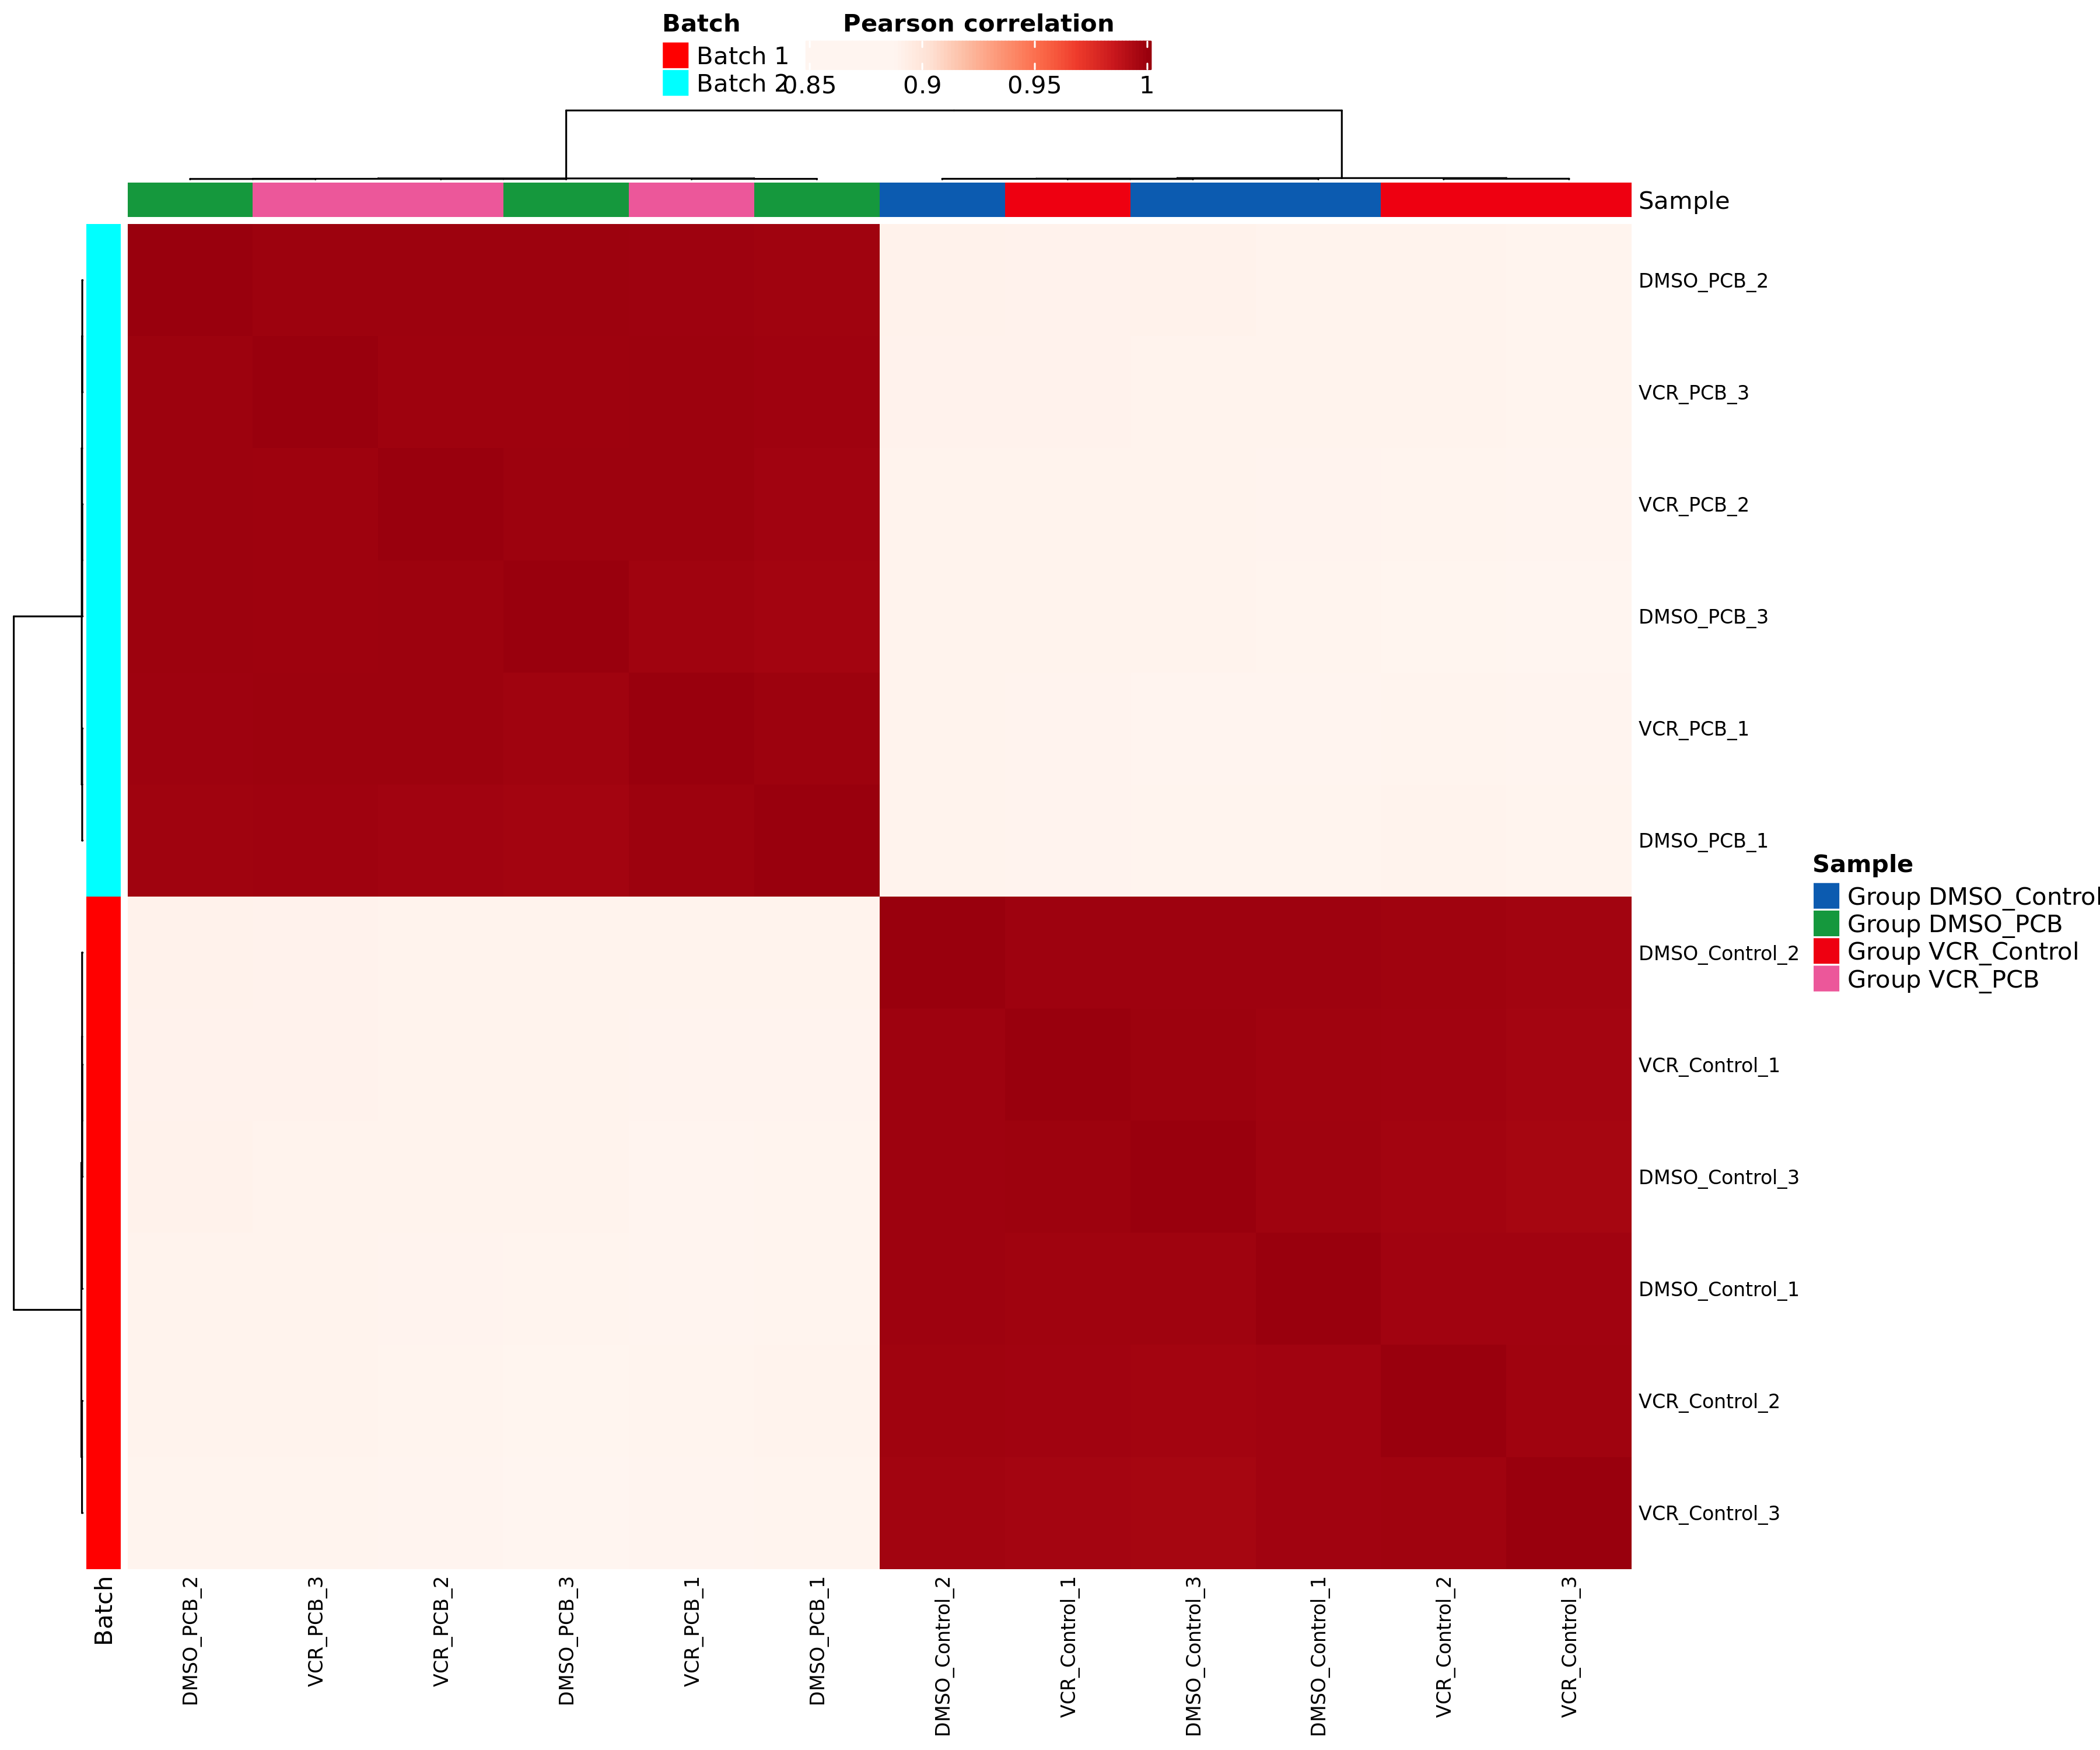

In [36]:
## PCA PLOTS: NORMALIZED DATA
plotPCA(normList=normProtein$normList, targets=normProtein$normTargets, method=normMethod, 
        col="group", prefix=NULL, dir=figs.dir, legend=TRUE, inset=-0.24, save=TRUE)

plotPCA(normList=normProtein$normList, targets=normProtein$normTargets, method=normMethod, 
        col="batch", prefix=NULL, dir=figs.dir, legend=TRUE, inset=-0.09, save=TRUE)

## CORRELATION HEATMAP: NORMALIZED DATA
plotCorHM(normList=normProtein$normList, targets=normProtein$normTargets, method=normMethod, 
          prefix=NULL, dir=figs.dir, save=TRUE)


images <- c(list.files(path=figs.dir, pattern=paste("PCAplot-",normMethod,"-", sep=""), full.names=TRUE), 
            list.files(path=figs.dir, pattern=paste("CorHM-",normMethod, ".png", sep=""), full.names=TRUE));images

display_png(file='protein_analysis/02_quality_control/PCAplot-cycloess-group.png')
display_png(file='protein_analysis/02_quality_control/PCAplot-cycloess-batch.png')
display_png(file='protein_analysis/02_quality_control/CorHM-cycloess.png')



### **5.5 Imputation**

In [37]:
##-----------------------------
##  IMPUTE NORMALIZED DATA
##-----------------------------
## norm.methods   <- c("log2", "median", "mean", "vsn", "quantile", "cycloess", "rlr", "gi")
## impute.methods <- c("none", "knn", "qrilc", "mindet", "minprob", "min", "zero")

normMethod
imputeMethod

imputeProtein <- imputeMyData(normList      = normProtein$normList, 
                              normAnnot     = normProtein$normAnnot, 
                              targets       = normProtein$normTargets, 
                              normMethod    = normMethod, 
                              imputeMethod  = imputeMethod,
                              prefix        = NULL,
                              enrich        = "protein")


##----------------------------------
##  SAVE IMPUTED NORMALIZED DATA
##----------------------------------
comboMethod <- paste(normMethod, imputeMethod,sep="_")
filename <- paste("protein_", comboMethod, "_normalized_intensities.csv",sep="");filename
write.csv(cbind(imputeProtein$impAnnot[rownames(imputeProtein$impList[[comboMethod]]), ],
                imputeProtein$impList[[comboMethod]]), file.path(dat.dir, filename), row.names=FALSE)

list.files(path=file.path("data","protein_data"), pattern=".csv")
list.files(path=dat.dir, pattern=".csv")

[1] "cycloess"

[1] "none"

[2021-09-10 12:45:37]: matching input data (override = FALSE) ...
[2021-09-10 12:45:37]: matching input data ...
[2021-09-10 12:45:37]: imputing matched data ...


[1] "protein_cycloess_none_normalized_intensities.csv"

[1] "001_protein_raw_extract.csv" "002_protein_raw_annot.csv"  
[3] "003_protein_raw_data.csv"    "protein_cycloess_none.csv"

[1] "protein_annotation.csv"                          
[2] "protein_cycloess_none_normalized_intensities.csv"
[3] "protein_intensities.csv"                         
[4] "protein_sample_metadata.csv"

[1] "protein_analysis/02_quality_control/PCAplot-cycloess_none-group.png"
[1] "[2021-09-10 13:12:03] [09]  plotPCA : matrixcycloess_none protein_analysis/02_quality_control/PCAplot-cycloess_none-group.png"


png 
  2

[1] "protein_analysis/02_quality_control/PCAplot-cycloess_none-batch.png"
[1] "[2021-09-10 13:12:03] [09]  plotPCA : matrixcycloess_none protein_analysis/02_quality_control/PCAplot-cycloess_none-batch.png"


png 
  2

[1] "protein_analysis/02_quality_control/CorHM-cycloess_none.png"
[1] "[2021-09-10 13:12:03] [08]  CorHM : cycloess_none protein_analysis/02_quality_control/CorHM-cycloess_none.png"


png 
  2

[1] "protein_analysis/02_quality_control/PCAplot-cycloess_none-batch.png"
[2] "protein_analysis/02_quality_control/PCAplot-cycloess_none-group.png"
[3] "protein_analysis/02_quality_control/CorHM-cycloess_none.png"

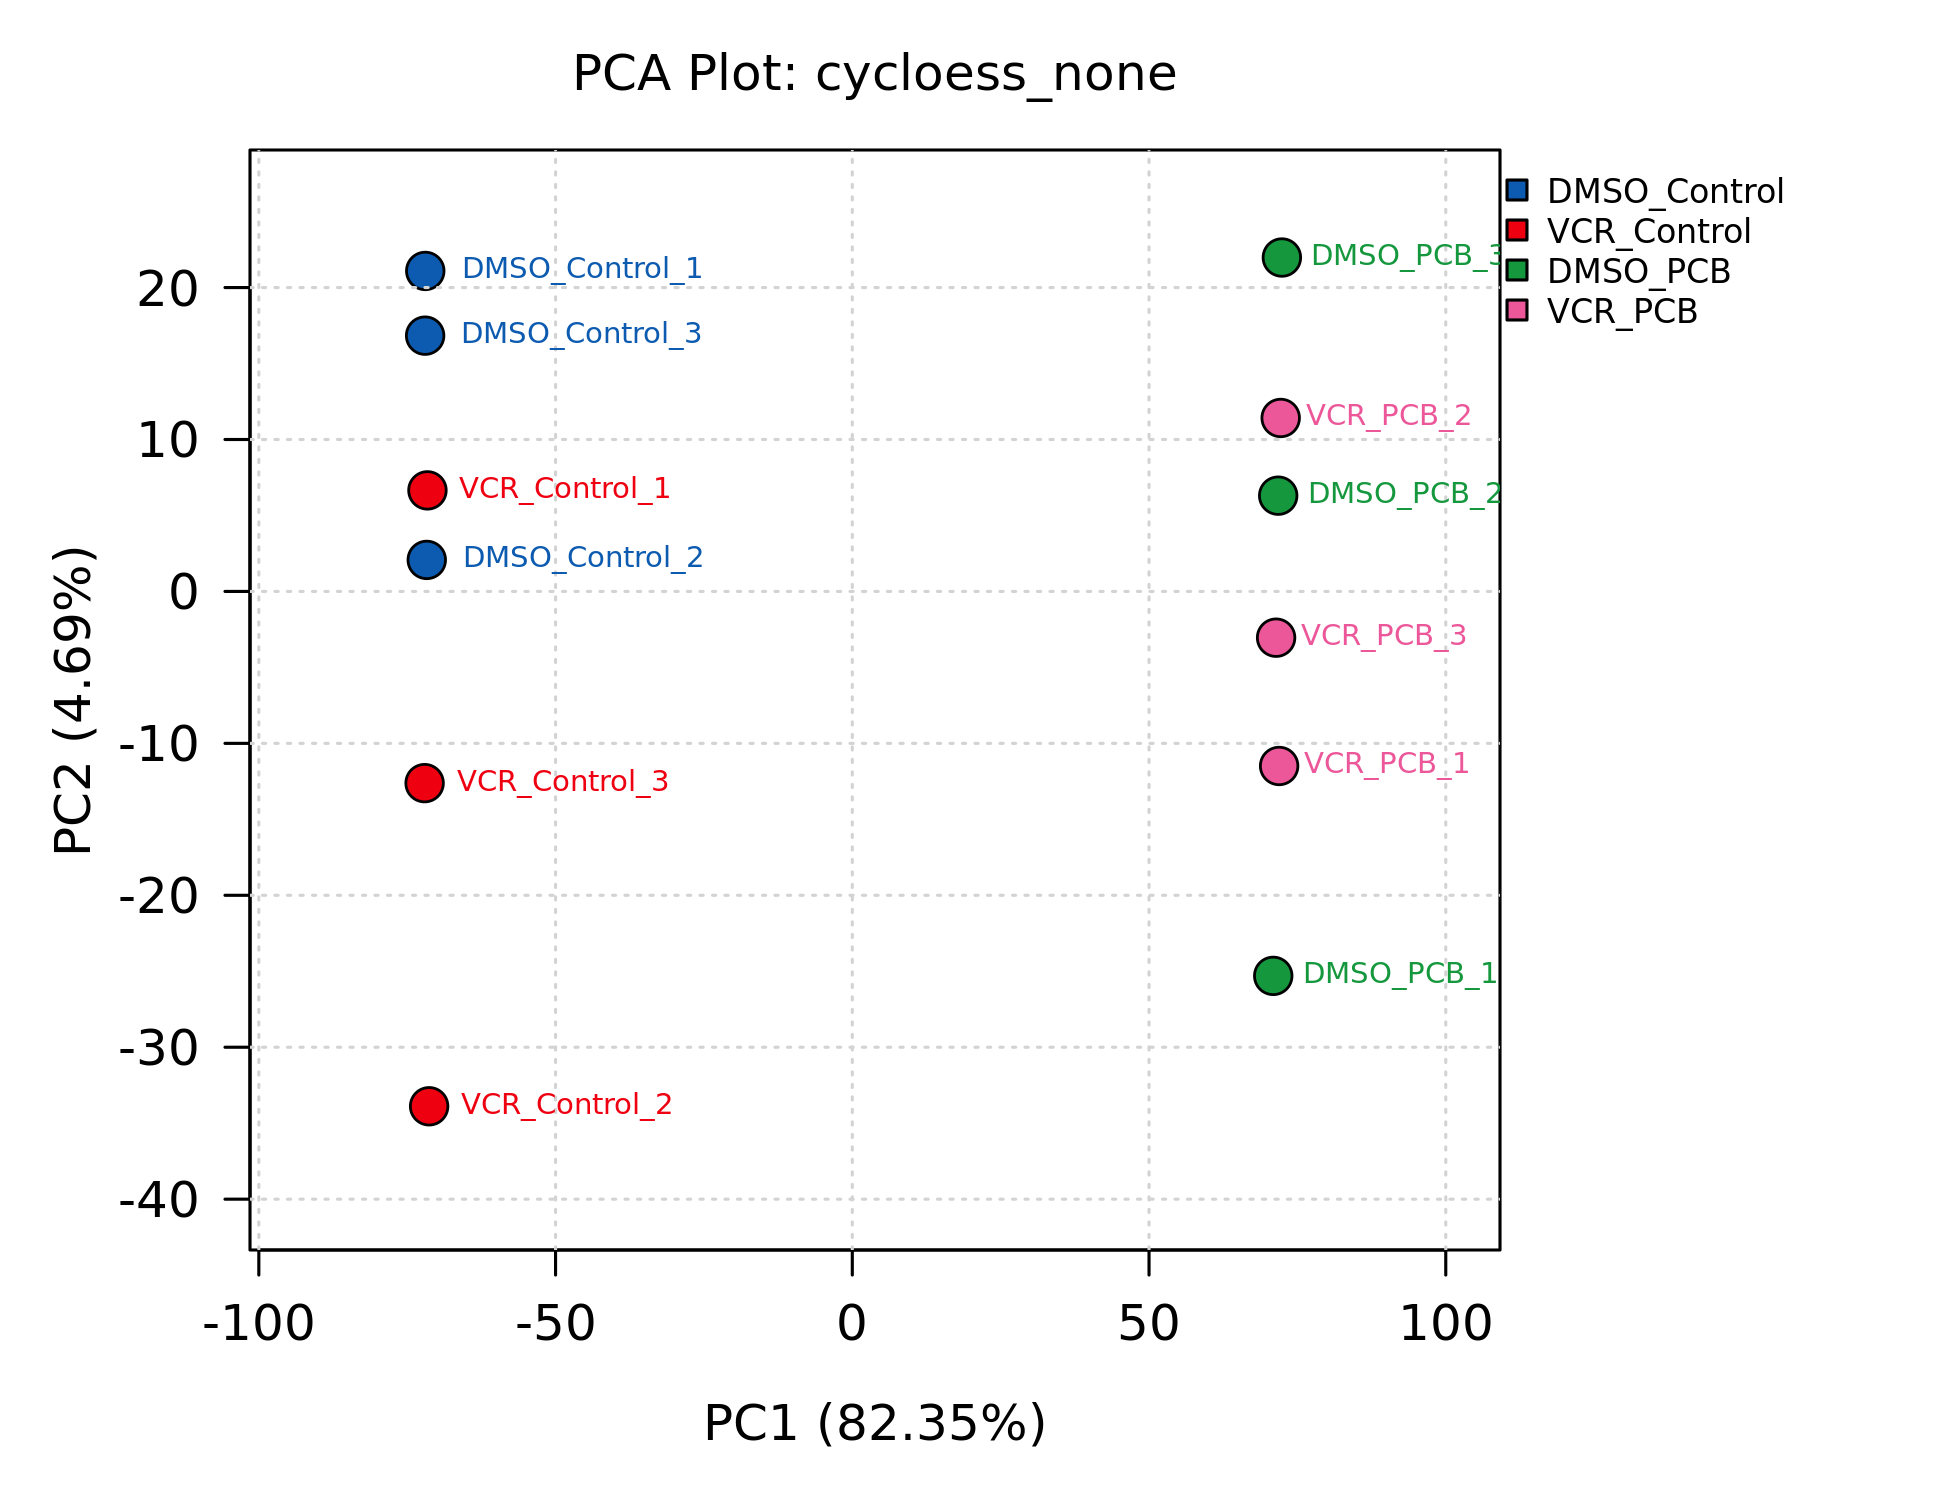

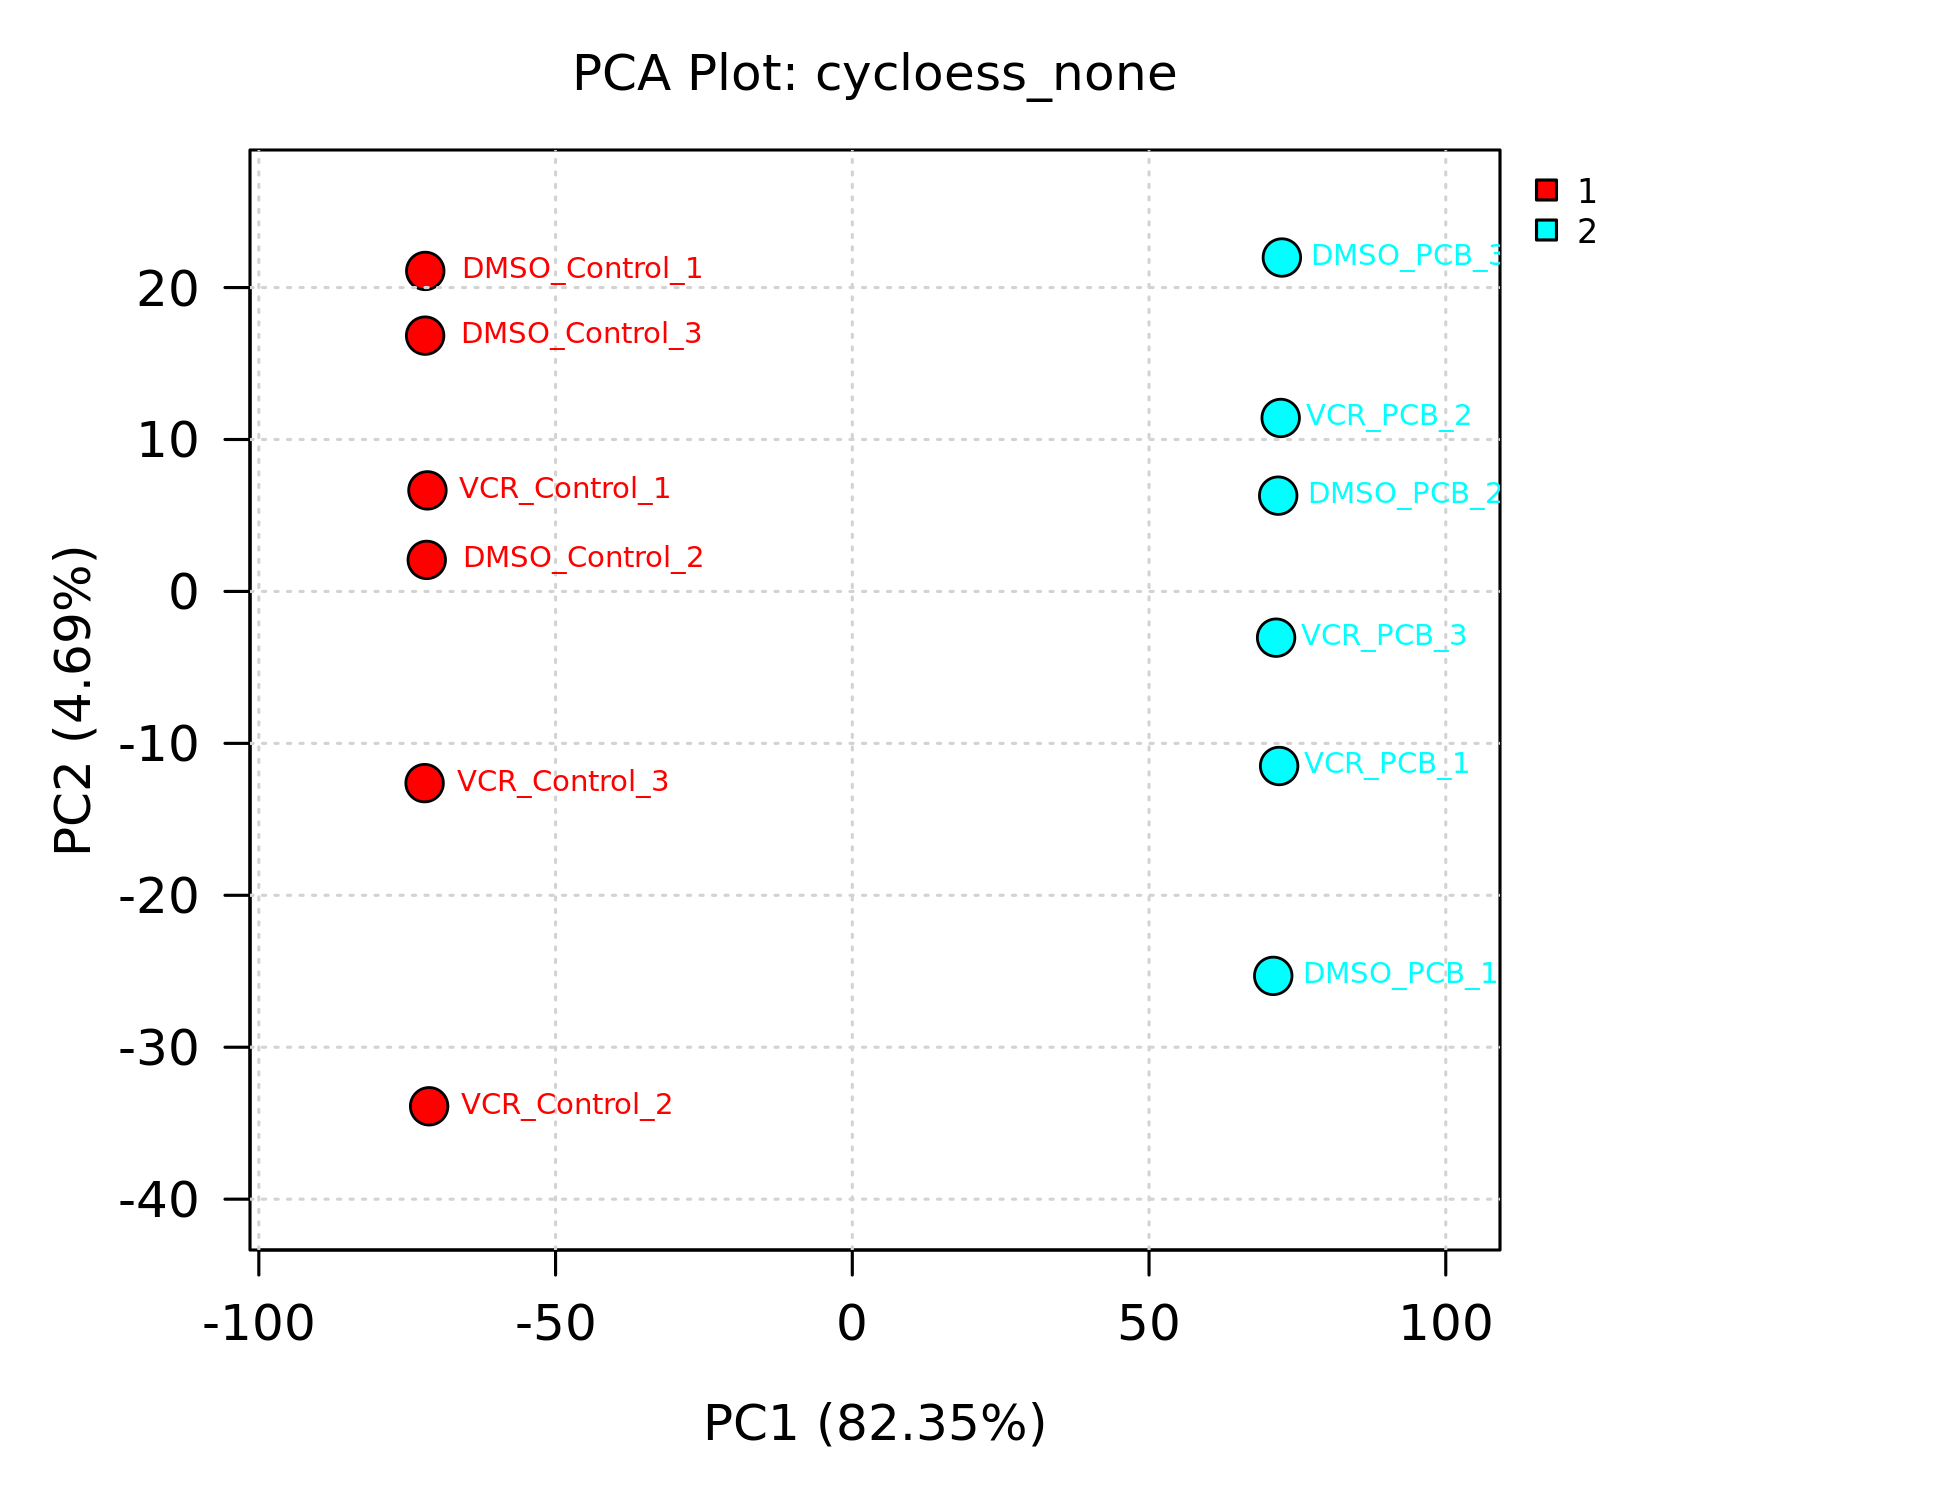

In [39]:
## PCA PLOTS: NORMALIZED IMPUTED DATA
plotPCA(normList=imputeProtein$impList[[comboMethod]], targets=imputeProtein$impTargets,
        method=comboMethod, col="group", prefix=NULL, dir=figs.dir, legend=TRUE, inset=-0.24, save=TRUE)

plotPCA(normList=imputeProtein$impList[[comboMethod]], targets=imputeProtein$impTargets,
        method=comboMethod, col="batch", prefix=NULL, dir=figs.dir, legend=TRUE, inset=-0.09, save=TRUE)

## CORRELATION HEATMAP: NORMALIZED IMPUTED DATA
plotCorHM(normList=imputeProtein$impList[[comboMethod]], targets=imputeProtein$impTargets,
          method=comboMethod, prefix=NULL, dir=figs.dir, save=TRUE)


images <- c(list.files(path=figs.dir, pattern=paste("PCAplot",comboMethod, sep="-"),full.names=TRUE), 
            list.files(path=figs.dir, pattern=paste("CorHM",comboMethod, sep="-"), full.names=TRUE));images

display_png(file='protein_analysis/02_quality_control/PCAplot-cycloess_none-group.png')
display_png(file='protein_analysis/02_quality_control/PCAplot-cycloess_none-batch.png')


## **6. Differential Expression**

### **6.1 Design Matrix**

In [27]:
##-------------------------
##  [07] DESIGN MATRIX 
##-------------------------
## design = ~0 + group
## design = ~0 + group + batch

## mytargets <- imputeProtein$impTargets
## mytargets$group <- factor(mytargets$group, levels=ordered(unique(mytargets$group)));mytargets$group
## mytargets$batch <- paste("batch_", mytargets$batch,sep="");mytargets$batch
## mytargets$batch <- factor(mytargets$batch, levels=ordered(unique(mytargets$batch)));mytargets$batch
## mydesign <- model.matrix(~0 + mytargets$group + mytargets$batch, data=mytargets)
## colnames(mydesign) <- c(levels(mytargets$group), levels(mytargets$batch)[-1]); mydesign

## mydesign

### **7.2 Contrasts**

### **7.3 Limma Analysis**

In [40]:
comboMethod
names(imputeProtein$impList)
contrast.vec

##----------------------
##   LIMMA ANALYSIS
##----------------------
min.lfc  <- 1
min.pval <- 0.055

lim <- runLimmaEbayes(normData      = imputeProtein$impList[[comboMethod]],
                      normAnnot     = imputeProtein$impAnnot,
                      targets       = imputeProtein$impTargets, 
                      method        = comboMethod, 
                      design        = NULL, 
                      contrast.vec  = contrast.vec, 
                      robust        = FALSE,
                      min.lfc       = min.lfc,
                      min.pval      = min.pval, 
                      adj.method    = "BH", 
                      top           = NULL,
                      legend        = FALSE, 
                      inset         = -0.2, 
                      dir           = lim.dir, 
                      save          = TRUE, 
                      enrich        = "protein")


lim$contrast.vec <- contrast.vec
lim$sig.ids      <- getSigIDs(stackStats=lim$stackStats, id="UniprotID", 
                              min.pval=min.pval, min.lfc=min.lfc, dir=lim.dir)
lim$sig.summary  <- getSigSummary(stackStats=lim$stackStats, min.pval=min.pval, 
                                  min.lfc=min.lfc) 
lim$dirs         <- list(dat.dir=dat.dir, figs.dir=figs.dir, lim.dir=lim.dir, 
                         fun.dir=fun.dir, proj.dir=proj.dir)





[1] "cycloess_none"

[1] "cycloess_none"

[1] "VCR_Control_vs_DMSO_Control = VCR_Control-DMSO_Control"        
[2] "DMSO_PCB_vs_DMSO_Control = DMSO_PCB-DMSO_Control"              
[3] "VCR_PCB_vs_DMSO_Control = VCR_PCB-DMSO_Control"                
[4] "VCR_PCB_vs_VCR_Control = VCR_PCB-VCR_Control"                  
[5] "VCR_PCB_vs_DMSO_PCB = VCR_PCB-DMSO_PCB"                        
[6] "Comparative = (VCR_Control-DMSO_Control)-(VCR_PCB-VCR_Control)"


[2021-09-10 12:45:37]: matching input data (override = FALSE) ...
[2021-09-10 12:45:37]: matching input data ...
[2021-09-10 12:45:37]: changing sampleIDs in targets and normData to sample name...
[2021-09-10 12:45:37]: design == NULL.
[2021-09-10 12:45:37]: auto-generating no intercept (means model) design matrix using group +/- batch. 
[2021-09-10 12:45:37]:  (i.e. design = ~0 + group or design = ~0 + group + batch))
[1] "design formula:"
~0 + targets[, "group"] + targets[, "batch"]
<environment: 0x56207ec8ceb0>
design matrix:

               DMSO_Control VCR_Control DMSO_PCB VCR_PCB B2
DMSO_Control_1            1           0        0       0  0
DMSO_Control_2            1           0        0       0  0
DMSO_Control_3            1           0        0       0  0
VCR_Control_1             0           1        0       0  0
VCR_Control_2             0           1        0       0  0
VCR_Control_3             0           1        0       0  0
DMSO_PCB_1                0           0    

Warning message:
“Partial NA coefficients for 7750 probe(s)”


[1] "[2021-09-10 13:14:41]  p-value histogram: VCR_Control_vs_DMSO_Control"
[1] "[2021-09-10 13:14:41]  adj.p-value histogram: VCR_Control_vs_DMSO_Control"
[1] "[2021-09-10 13:14:41]  p-value histogram: DMSO_PCB_vs_DMSO_Control"
[1] "[2021-09-10 13:14:41]  adj.p-value histogram: DMSO_PCB_vs_DMSO_Control"
[1] "[2021-09-10 13:14:42]  p-value histogram: VCR_PCB_vs_DMSO_Control"
[1] "[2021-09-10 13:14:42]  adj.p-value histogram: VCR_PCB_vs_DMSO_Control"
[1] "[2021-09-10 13:14:42]  p-value histogram: VCR_PCB_vs_VCR_Control"
[1] "[2021-09-10 13:14:42]  adj.p-value histogram: VCR_PCB_vs_VCR_Control"
[1] "[2021-09-10 13:14:42]  p-value histogram: VCR_PCB_vs_DMSO_PCB"
[1] "[2021-09-10 13:14:42]  adj.p-value histogram: VCR_PCB_vs_DMSO_PCB"
[1] "[2021-09-10 13:14:42]  p-value histogram: Comparative"
[1] "[2021-09-10 13:14:43]  adj.p-value histogram: Comparative"
[1] "overall x-range =  -12.2420924102508, 12.2420924102508"
[1] "overall y-range = 0, 17.9621055511815"
[1] "[2021-09-10 13:14:43]  vol

limma analysis complete ...





         VCR_Control_vs_DMSO_Control DMSO_PCB_vs_DMSO_Control
up                                 0                      965
not sig.                        7750                     5769
down                               0                     1016
total                              0                     1981
         VCR_PCB_vs_DMSO_Control VCR_PCB_vs_VCR_Control VCR_PCB_vs_DMSO_PCB
up                           961                    961                   0
not sig.                    5772                   5778                7750
down                        1017                   1011                   0
total                       1978                   1972                   0
         Comparative
up               995
not sig.        5798
down             957
total           1952


In [41]:
## VOLCANO PLOTS (FDR)

## contrastNames <- names(lim$statList);contrastNames
rngv  <-get_volcano_range(contrastNames=contrastNames, statList=lim$statList, 
                          xval="logFC", yval=c("adj.P.Val"))

lapply(contrastNames, function(x){
   
   stats <- data.frame(lim$statList[[x]]); comparison <- x
   
   volcanoPlot(stats      = stats, 
               comparison = comparison, 
               min.lfc    = min.lfc, 
               min.pval   = min.pval, type="adj", 
               rx         = rngv$rx, 
               ry         = rngv$ry, 
               top        = NULL,
               legend     = FALSE,
               inset      = -0.2, 
               dir        = lim.dir, 
               save       = TRUE, 
               enrich     = "protein")
   
})

display_png(file='')

[1] "overall x-range =  -12.2420924102508, 12.2420924102508"
[1] "overall y-range = 0, 14.1350953220608"
[1] "[2021-09-10 13:16:06]  volcano plot: VCR_Control_vs_DMSO_Control"
[1] "[2021-09-10 13:16:07]  volcano plot: DMSO_PCB_vs_DMSO_Control"
[1] "[2021-09-10 13:16:08]  volcano plot: VCR_PCB_vs_DMSO_Control"
[1] "[2021-09-10 13:16:09]  volcano plot: VCR_PCB_vs_VCR_Control"
[1] "[2021-09-10 13:16:09]  volcano plot: VCR_PCB_vs_DMSO_PCB"
[1] "[2021-09-10 13:16:10]  volcano plot: Comparative"


[[1]]
png 
  2 

[[2]]
png 
  2 

[[3]]
png 
  2 

[[4]]
png 
  2 

[[5]]
png 
  2 

[[6]]
png 
  2

In [46]:
glXYPlot(x=lim$statList$VCR_Control_vs_DMSO_Control$logFC,
        y= -log(lim$statList$VCR_Control_vs_DMSO_Control$sig.FDR),
        groups = lim$targets$group[1],
        samples = lim$targets$sample[1:6],
        anno = lim$normAnnot$UniprotID,
        display.columns = colnames(lim$normAnnot),
        xlab = "log2 Fold Change",
        ylab = "-log10 (FDR adjusted p-value)" ,
        side.main = "UniprotID",
        side.xlab = "group",
        side.ylab = "log2 abundance",
        side.log = FALSE)

ERROR: Error in checkThat(side.main, isIn(display.columns)): Second argument should contain the first.


In [31]:
## VOLCANO PLOTS (P-VALUE)

## contrastNames <- names(lim$statList);contrastNames
rngvp  <-get_volcano_range(contrastNames=contrastNames, statList=lim$statList, 
                           xval="logFC", yval=c("P.Value"))

lapply(contrastNames, function(x){
   
   stats <- data.frame(lim$statList[[x]]); comparison <- x
   
   volcanoPlot(stats      = stats, 
               comparison = comparison, 
               min.lfc    = min.lfc, 
               min.pval   = min.pval, 
               type       = "pval", 
               rx         = rngvp$rx, 
               ry         = rngvp$ry, 
               top        = NULL, 
               legend     = FALSE, 
               inset      = -0.2, 
               dir        = lim.dir, 
               save       = TRUE, 
               enrich     = "protein")
   
})

ERROR: Error in get_volcano_range(contrastNames = contrastNames, statList = lim$statList, : could not find function "get_volcano_range"


In [32]:
## GET MD PLOTS 

## contrastNames <- names(lim$statList);contrastNames
rngmd  <-get_md_range(contrastNames=contrastNames, statList=lim$statList, xval="AveExpr", yval="logFC")



## MD-PLOT (FDR)

## lapply(contrastNames, function(x){
##    
##    stats <- data.frame(lim$statList[[x]]); comparison <- x
##    
##    volcanoPlot(stats=stats, comparison=comparison, min.lfc=1, min.pval=0.05, type="adj",
##                rx=rng$rx, ry=rng$ry, top=5, legend=TRUE, inset=-0.2,
##                dir=fun.dir, save=FALSE, enrich="protein")
## 
## })


## MD-PLOT (P-VALUE)

## lapply(contrastNames, function(x){
##    
##    stats <- data.frame(lim$statList[[x]]); comparison <- x
## 
##    volcanoPlot(stats=stats, comparison=comparison, min.lfc=1, min.pval=0.05, type="pval", 
##                rx=rng$rx, ry=rng$ry, top=NULL, legend=TRUE, inset=-0.2, 
##                dir=fun.dir, save=FALSE, enrich="protein")
##    
## })

ERROR: Error in get_md_range(contrastNames = contrastNames, statList = lim$statList, : could not find function "get_md_range"


In [41]:
library(bioimagetools)

In [42]:
volimage <- bioimagetools::readTIF("protein_analysis/03_diff_expression/VCR_PCB_vs_DMSO_Control_volcano.plot.tif")

In [43]:
print(dim(volimage))

[1] 3000 3300    3    1


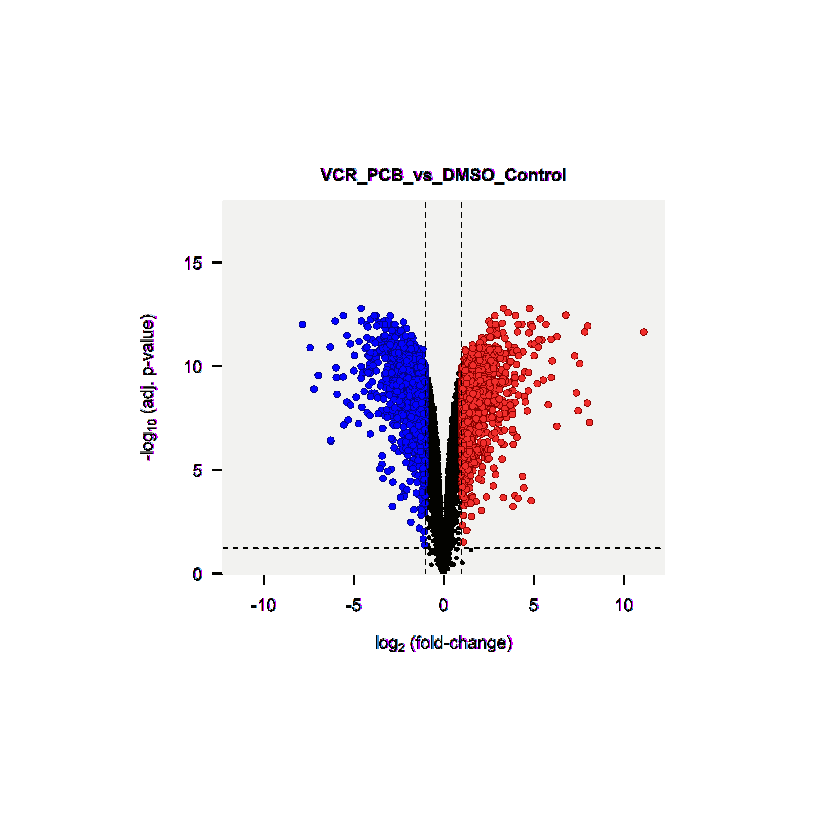

In [44]:
bioimagetools::img(volimage, z=1, col='rgb')

In [45]:
mdimage <- bioimagetools::readTIF("protein_analysis/03_diff_expression/VCR_PCB_vs_DMSO_Control_MD.plot.tif")

In [46]:
print(dim(mdimage))

[1] 6000 6600    3    1


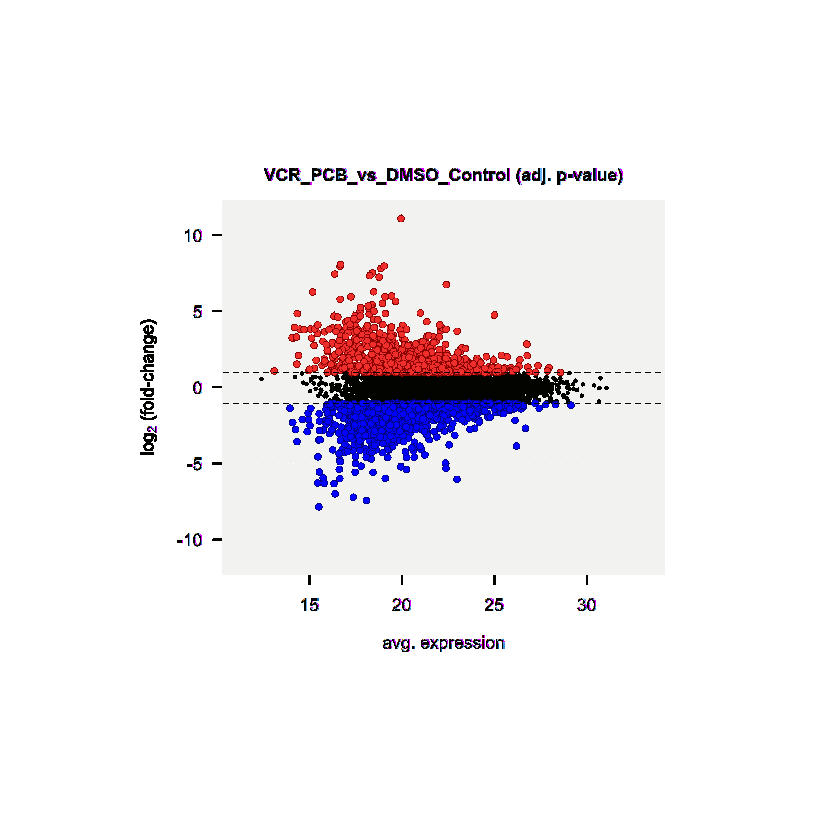

In [47]:
bioimagetools::img(mdimage, z=1, col='rgb')

In [33]:
##--------------------
##  SAVE WORKSPACE
##--------------------
workspace.file <- file.path("rdata","protein_limma_workspace.rdata")
save.image(file=workspace.file)

list.files("rdata")

[1] "phospho_data.rda"              "protein_data.rda"             
[3] "protein_limma_workspace.rdata"

## **5. R Session Info**

In [34]:
sink(file=file.path(lim.dir, "sessionInfo.txt"))
sessionInfo()
sink()

R version 3.6.3 (2020-02-29)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 18363)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] knitr_1.33    ttutils_1.0-1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       cellranger_1.1.0 pillar_1.6.2     compiler_3.6.3  
 [5] dbplyr_2.1.1     forcats_0.5.1    base64enc_0.1-3  digest_0.6.18   
 [9] uuid_0.1-2       lubridate_1.7.10 gtable_0.3.0     jsonlite_1.7.2  
[13] evaluate_0.14    lifecycle_1.0.0  tibble_3.1.1     pkgconfig_2.0.3 
[17] rlang_0.4.11     IRdisplay_0.7.0  DBI_1.1.1        IRkernel_1.2    
[21] xfun_0.22        haven_2.4.1      httr_1.4.2      

The versions of the R software and Bioconductor packages used for this analysis are listed below. It is important to save them if one wants to re-perform the analysis in the same conditions.

In [35]:
si <- as.character(toLatex(sessionInfo()))
si <- si[-c(1,length(si))]
si <- gsub("(\\\\verb)|(\\|)", "", si)
si <- gsub("~", " ", si)
si <- paste(si, collapse=" ")
si <- unlist(strsplit(si, "\\\\item"))
cat(paste(si, collapse="\n -"), "\n")

  
 - R version 3.6.3 (2020-02-29), x86_64-w64-mingw32   
 - Locale: LC_COLLATE=English_United States.1252, LC_CTYPE=English_United States.1252, LC_MONETARY=English_United States.1252, LC_NUMERIC=C, LC_TIME=English_United States.1252   
 - Running under: Windows 10 x64 (build 18363)   
 - Matrix products: default   
 - Base packages: base, datasets, graphics, grDevices, methods,     stats, tools, utils   
 - Other packages: knitr 1.33, ttutils 1.0-1   
 - Loaded via a namespace (and not attached): assertthat 0.2.1,     backports 1.2.1, base64enc 0.1-3, broom 0.7.9, cellranger 1.1.0,     colorspace 2.0-1, compiler 3.6.3, crayon 1.4.1, DBI 1.1.1,     dbplyr 2.1.1, digest 0.6.18, dplyr 1.0.6, ellipsis 0.3.2,     evaluate 0.14, fansi 0.4.2, forcats 0.5.1, generics 0.1.0,     ggplot2 3.3.5, glue 1.4.2, grid 3.6.3, gtable 0.3.0, haven 2.4.1,     hms 1.1.0, htmltools 0.3.6, httr 1.4.2, IRdisplay 0.7.0,     IRkernel 1.2, jsonlite 1.7.2, lifecycle 1.0.0, lubridate 1.7.10,     magrittr 2.0.1, mo